In [1]:
# import the usual suspects ...
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import urllib, os
import glob
import pickle
import time
import holidays
import timeit
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/Accidents/Accidents*.csv')], ignore_index = True)
print('Records:', df.shape[0], '\nColumns:',df.shape[1])
df.head()

Records: 931812 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201301BS70003,527060.0,177970.0,-0.171402,51.486361,1,2,2,1,02/01/2013,...,0,0,1,1,1,0,0,1,1,E01002844
1,201301BS70005,526900.0,178940.0,-0.173356,51.495115,1,3,1,2,04/01/2013,...,0,5,1,8,1,0,0,1,1,E01002821
2,201301BS70006,524240.0,181460.0,-0.210767,51.518353,1,3,1,1,07/01/2013,...,0,1,1,1,1,0,0,1,1,E01002878
3,201301BS70007,524320.0,181290.0,-0.209675,51.516808,1,3,2,1,10/01/2013,...,0,5,1,1,1,0,0,1,1,E01002831
4,201301BS70009,525450.0,178660.0,-0.194332,51.492922,1,3,2,1,04/01/2013,...,0,0,4,1,1,0,0,1,1,E01002851


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931812 entries, 0 to 931811
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               931812 non-null  object 
 1   Location_Easting_OSGR                        931676 non-null  float64
 2   Location_Northing_OSGR                       931676 non-null  float64
 3   Longitude                                    931666 non-null  float64
 4   Latitude                                     931666 non-null  float64
 5   Police_Force                                 931812 non-null  int64  
 6   Accident_Severity                            931812 non-null  int64  
 7   Number_of_Vehicles                           931812 non-null  int64  
 8   Number_of_Casualties                         931812 non-null  int64  
 9   Date                                         931812 non-nul

In [4]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",df['Accident_Severity'].value_counts())

Road severity description types :  3    769046
2    151184
1     11582
Name: Accident_Severity, dtype: int64


In [5]:
# Imports and initial setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
plt.style.use('fivethirtyeight')
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import seaborn as sns
import time
from IPython.display import Image
import matplotlib as mpl
# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb

# Metrics & Corss-Validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, make_scorer, classification_report, confusion_matrix)
import statsmodels
import matplotlib.pyplot as plt
import folium
#from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
#from pandas_profiling import ProfileReport
#import plotly.express as px
#import pprint
#import plotly.graph_objs as go
#import matplotlib as mpl
#import calendar
import warnings
warnings.filterwarnings('ignore')

In [67]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",df['Accident_Severity'].value_counts())

Road severity description types :  Slight     769046
Serious    151184
Fatal       11582
Name: Accident_Severity, dtype: int64


In [68]:
# Print markdown programatically for better visualization.
def printmd(string):
    display(Markdown(string))

In [69]:
# Plots and creates labels for values plotted. Used for exploration of features.
def plot_and_annotate(df, **kwarg):
    ax = df['percent'].sort_values().plot(kind='barh', **kwarg)
    for p in ax.patches:
        width = p.get_width()
        plt.text(5 + width, p.get_y() + 0.55 * p.get_height(),
                 '{:1.2f}%'.format(width),
                 ha='center', va='center')


In [70]:
# Creates percentages for value_counts of a pd.series object.
def create_count_percentages(series, name=None):
    values = series.value_counts()
    expanded_value = values.to_frame(name)
    expanded_value['percent'] = values.apply(lambda _: _ / series.size * 100)
    return expanded_value


In [71]:
# Data must be loaded before definin create_plot_data due to inside reference.
def create_plot_data(df, feature):
    return create_count_percentages(df[feature], name=feature)

In [72]:
def cast_df_features(df, feature_catalog):
    def parse_type(dtype):
        if dtype == 'int':
            return np.int8
        elif dtype == 'float':
            return np.float
        else:
            return dtype

    # Make a dict to use as dtypes for panda's dataframe
    features_dtypes = feature_catalog.set_index('feature_name')['pandas_dtype'].apply(parse_type).to_dict()
    # Keep only the columns that remain in the clean version of the dataframe
    features_dtypes = {k: v for k, v in features_dtypes.items() if k in data.columns}
    return data.astype(features_dtypes)

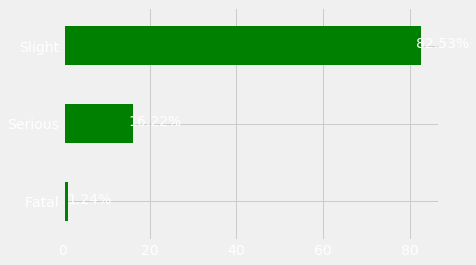

In [73]:
plot_data = create_plot_data(df, 'Accident_Severity')
plot_and_annotate(plot_data, color='green')

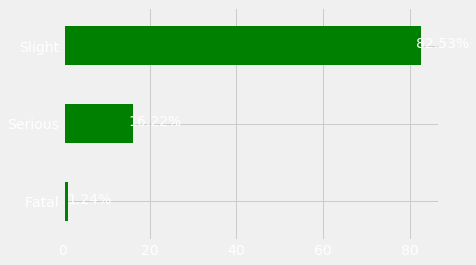

In [74]:
plot_data = create_plot_data(df, 'Accident_Severity')
plot_and_annotate(plot_data, color='green')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931812 entries, 0 to 931811
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               931812 non-null  object        
 1   Longitude                                    931666 non-null  float64       
 2   Latitude                                     931666 non-null  float64       
 3   Police_Force                                 931812 non-null  object        
 4   Accident_Severity                            931812 non-null  object        
 5   Number_of_Vehicles                           931812 non-null  int64         
 6   Number_of_Casualties                         931812 non-null  int64         
 7   Date                                         931812 non-null  datetime64[ns]
 8   Day_of_Week                                  931812 non-null  ob

In [76]:
df.Accident_Severity.value_counts()

Slight     769046
Serious    151184
Fatal       11582
Name: Accident_Severity, dtype: int64

In [80]:
df['Road_Type'].value_counts()/df.shape[0]*100

Single carriageway    73.967682
Dual carriageway      14.955823
Roundabout             6.552616
One way street         2.262798
Slip road              1.156780
Unknown                1.104301
Name: Road_Type, dtype: float64

In [78]:
zero = df[df['Road_Type'] == 'Data missing or out of range']
create_count_percentages(zero['Accident_Severity'])

,Accident_Severity,percent
Slight,1,100.0


In [79]:
df.drop(zero.index, inplace=True)

In [81]:
# prepare dataframe with simple counts
counts = df.groupby(['Road_Type', 'Accident_Severity']).size()

counts = counts.rename_axis(['Road_Type', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,2298,20176,116886
One way street,135,3112,17838
Roundabout,174,7061,53823
Single carriageway,8829,118524,561886
Slip road,92,1248,9439
Unknown,54,1063,9173


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


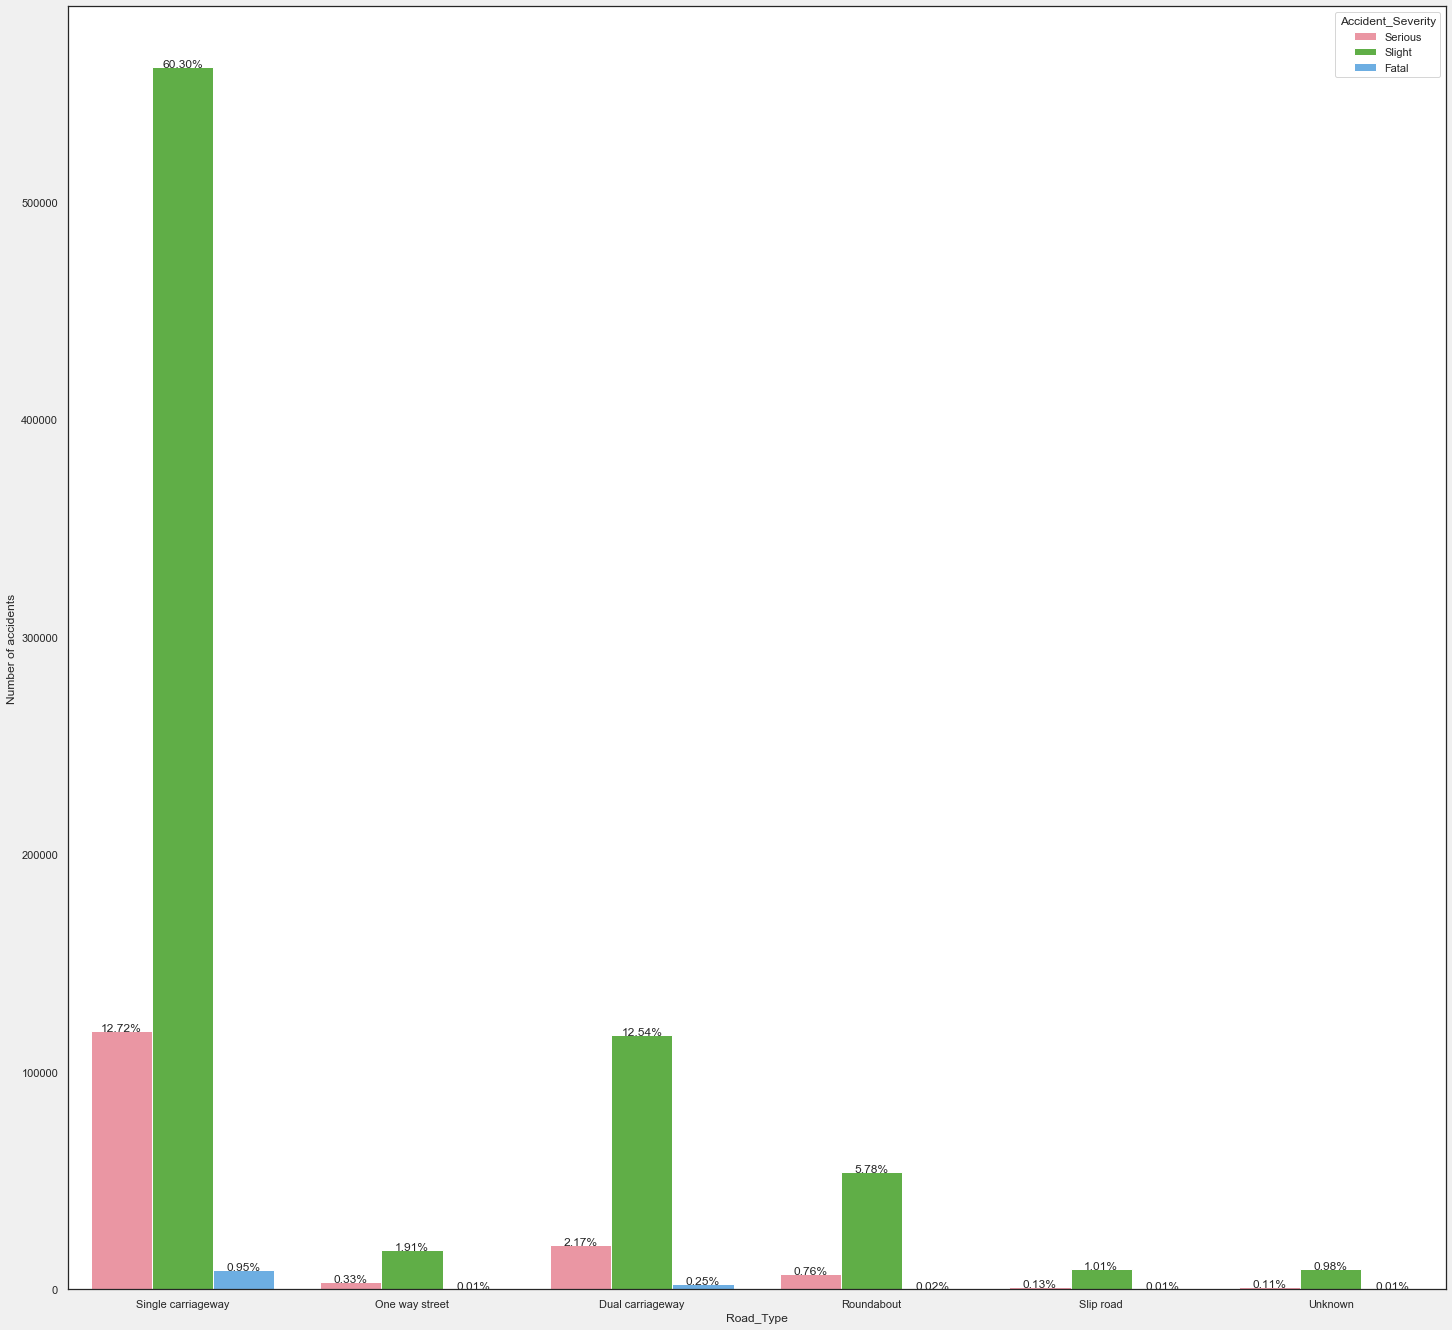

In [83]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Road_Type", hue="Accident_Severity",data=df)
ax.set(xlabel="Road_Type",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [90]:
df['Speed_limit'].value_counts()/df.shape[0]*100

30.0    62.405566
60.0    13.318544
40.0     8.331375
70.0     6.638504
20.0     5.276416
50.0     4.025303
10.0     0.000215
0.0      0.000107
Name: Speed_limit, dtype: float64

In [88]:
zero1 = df[df['Speed_limit'] == '0.0']
create_count_percentages(zero1['Accident_Severity'])

,Accident_Severity,percent


In [89]:
df.drop(zero1.index, inplace=True)

In [91]:
# prepare dataframe with simple counts
counts = df.groupby(['Speed_limit', 'Accident_Severity']).size()

counts = counts.rename_axis(['Speed_limit', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Speed_limit,,,
0.0,NaN,NaN,1.0
10.0,NaN,NaN,2.0
20.0,231.0,7605.0,41326.0
30.0,3879.0,86040.0,491533.0
40.0,1148.0,13330.0,63148.0
50.0,878.0,6702.0,29925.0
60.0,4030.0,28364.0,91699.0
70.0,1416.0,9135.0,51302.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


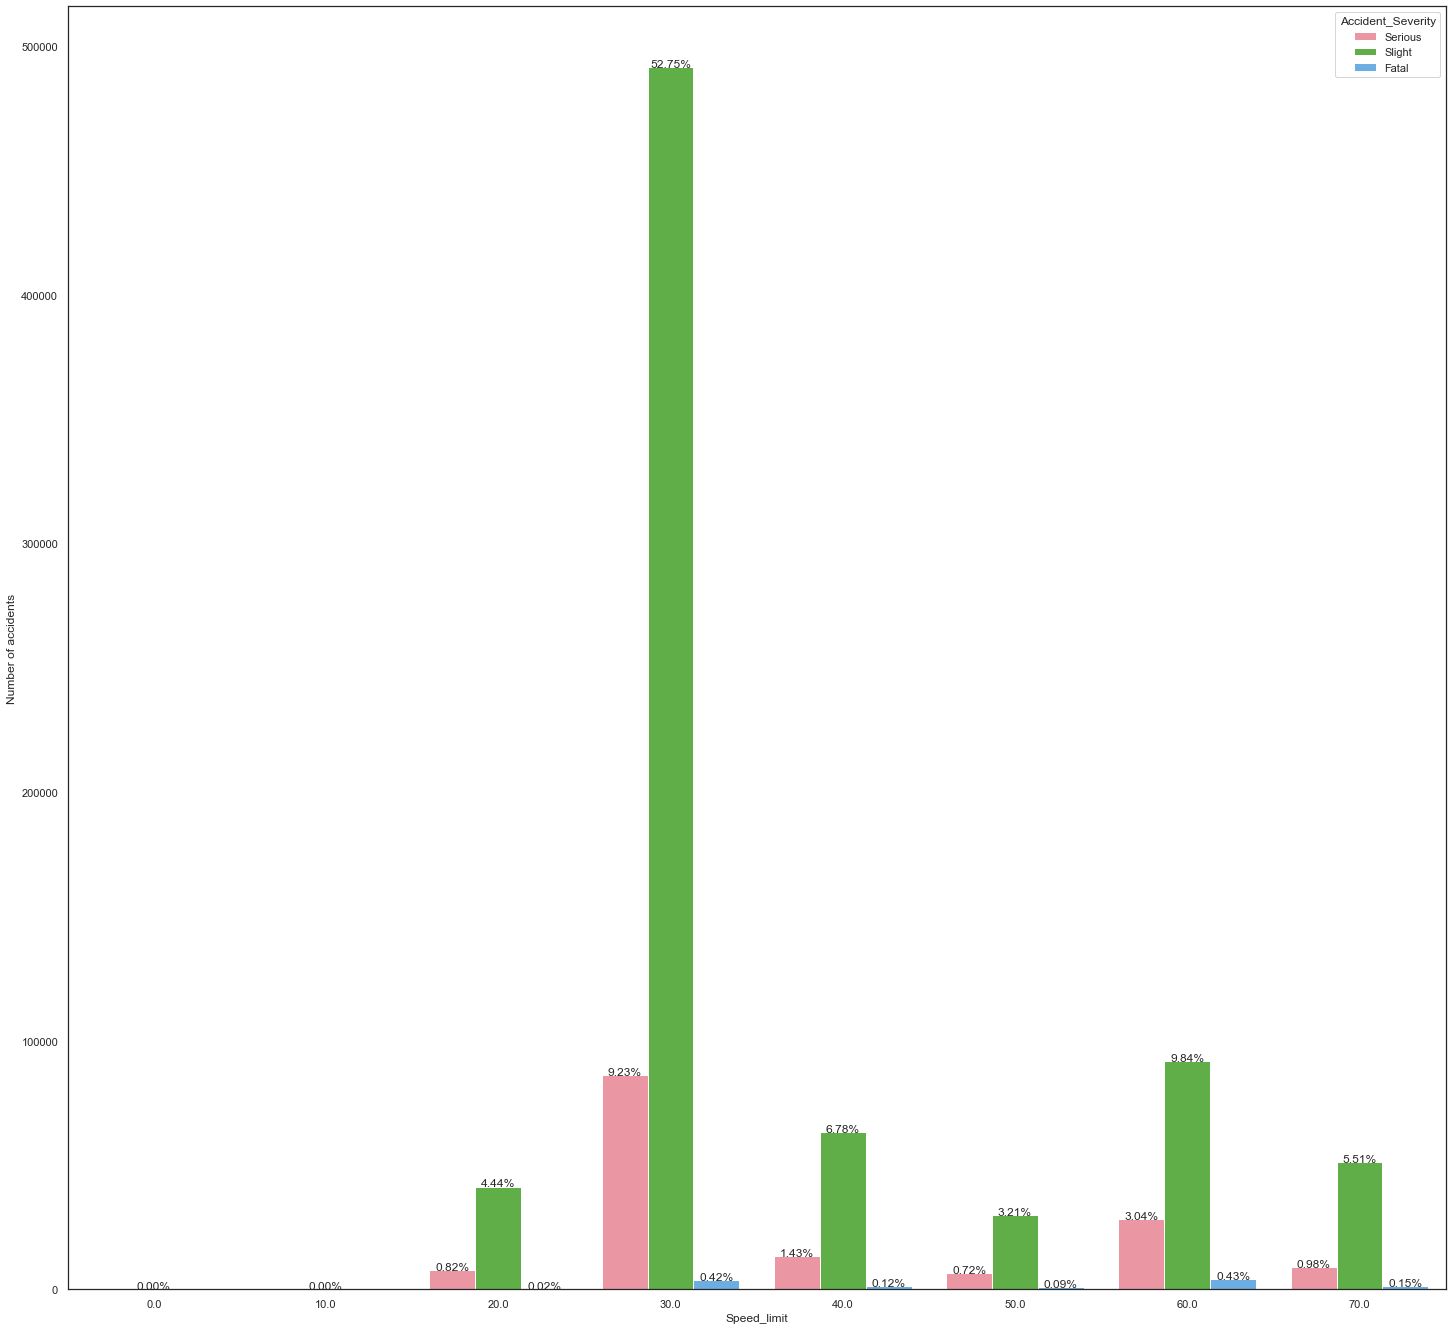

In [92]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Speed_limit", hue="Accident_Severity",data=df)
ax.set(xlabel="Speed_limit",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [99]:
df['Junction_Detail'].value_counts()/df.shape[0]*100

Not at junction or within 20 meters    40.775906
T or staggered junction                31.035043
Crossroads                              9.713517
Roundabout                              8.586855
Private drive or entrance               3.197179
Other junction                          2.994671
Slip road                               1.445659
Mini-roundabout                         1.304086
More than 4 arms (not roundabout)       0.947085
Name: Junction_Detail, dtype: float64

In [97]:
zero2 = df[df['Junction_Detail'] == 'Data missing or out of range']
create_count_percentages(zero2['Accident_Severity'])
df.drop(zero2.index, inplace=True)

,Accident_Severity,percent
Slight,2723,94.515793
Serious,157,5.449497
Fatal,1,0.034710


In [98]:
df.drop(zero2.index, inplace=True)

In [100]:
# prepare dataframe with simple counts
counts = df.groupby(['Junction_Detail', 'Accident_Severity']).size()

counts = counts.rename_axis(['Junction_Detail', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Junction_Detail,,,
Crossroads,643,12618,76963
Mini-roundabout,41,1450,10622
More than 4 arms (not roundabout),44,1244,7509
Not at junction or within 20 meters,7448,69658,301641
Other junction,290,4697,22829
Private drive or entrance,262,4844,24591
Roundabout,292,9148,70319
Slip road,176,1685,11567
T or staggered junction,2385,45678,240206


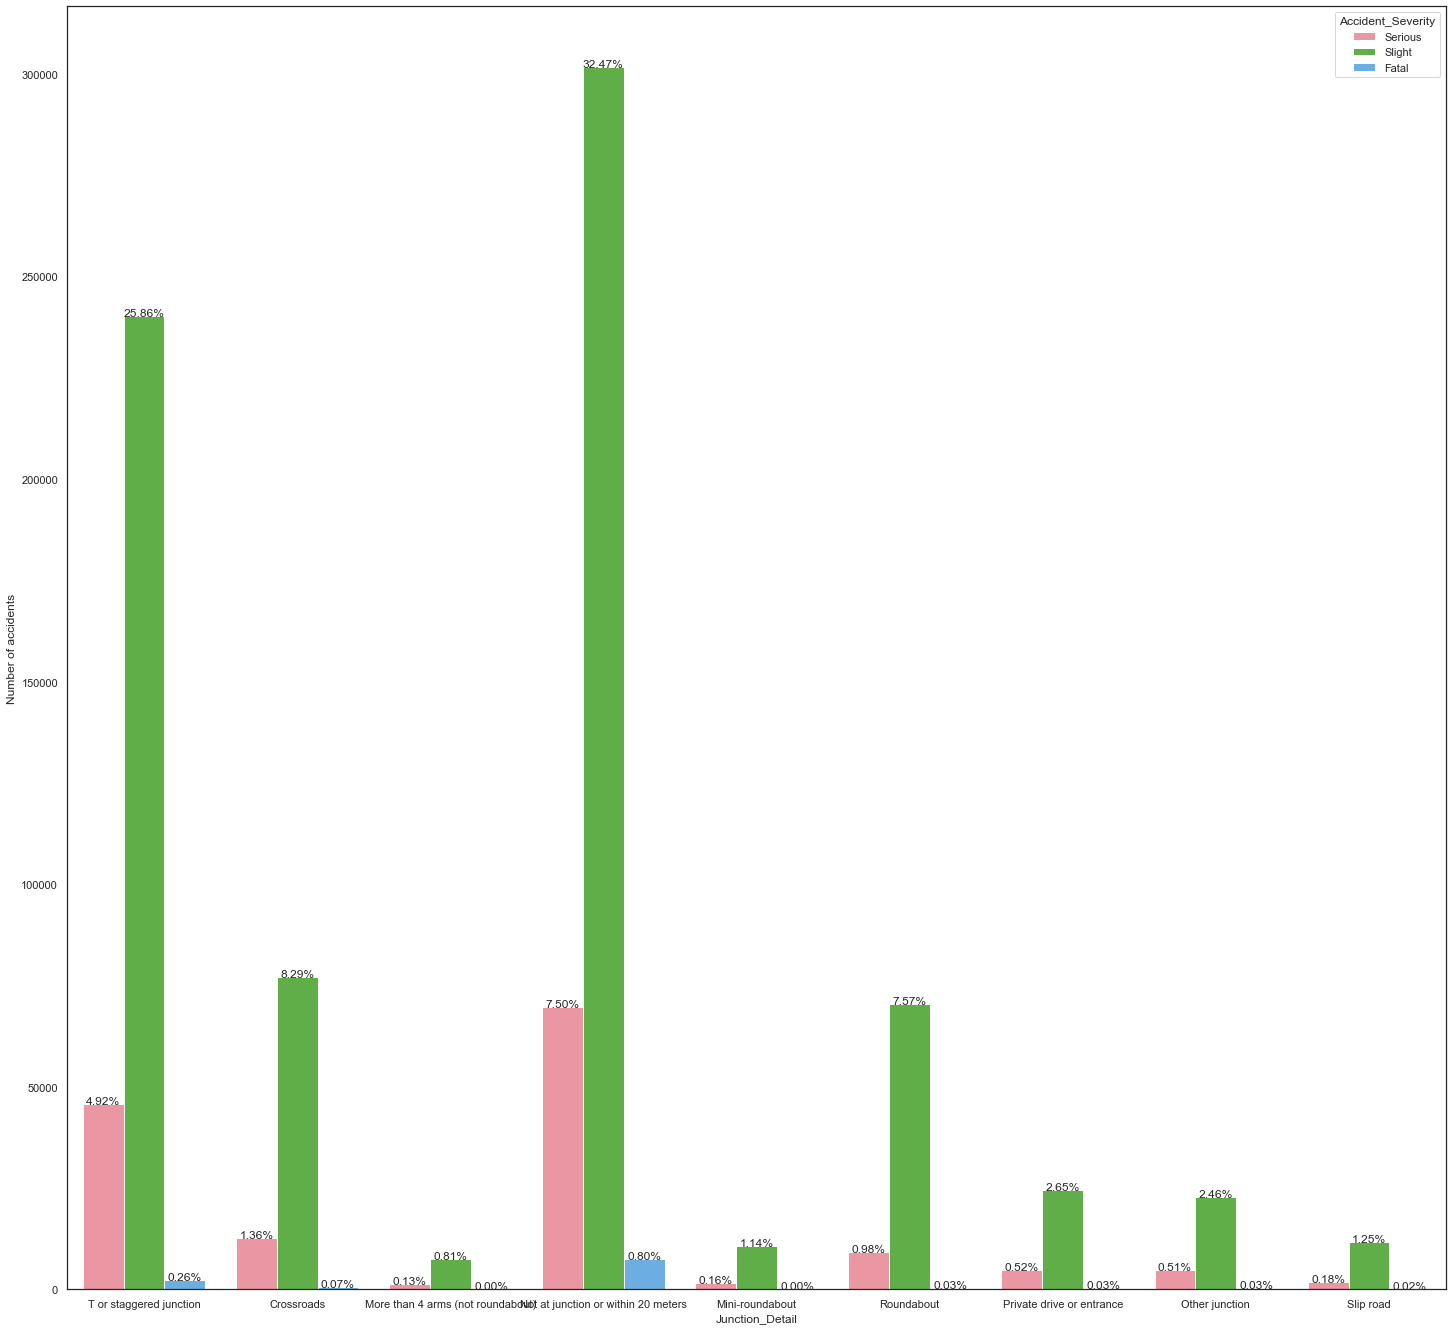

In [101]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Junction_Detail", hue="Accident_Severity",data=df)
ax.set(xlabel="Junction_Detail",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [102]:
df['Junction_Control'].value_counts()/df.shape[0]*100

Give way or uncontrolled               47.096733
Data missing or out of range           41.451257
Auto traffic signal                    10.640254
Stop sign                               0.539807
Authorised person                       0.229746
Not at junction or within 20 metres     0.042203
Name: Junction_Control, dtype: float64

In [104]:
zero3 = df[df['Junction_Control'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

,Accident_Severity,percent


In [ ]:
df.drop(zero3.index, inplace=True)

In [105]:
# prepare dataframe with simple counts
counts = df.groupby(['Junction_Control', 'Accident_Severity']).size()

counts = counts.rename_axis(['Junction_Control', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Junction_Control,,,
Authorised person,10,352,1772
Auto traffic signal,636,12273,85923
Give way or uncontrolled,3438,67511,366509
Not at junction or within 20 metres,17,108,267
Stop sign,29,706,4279


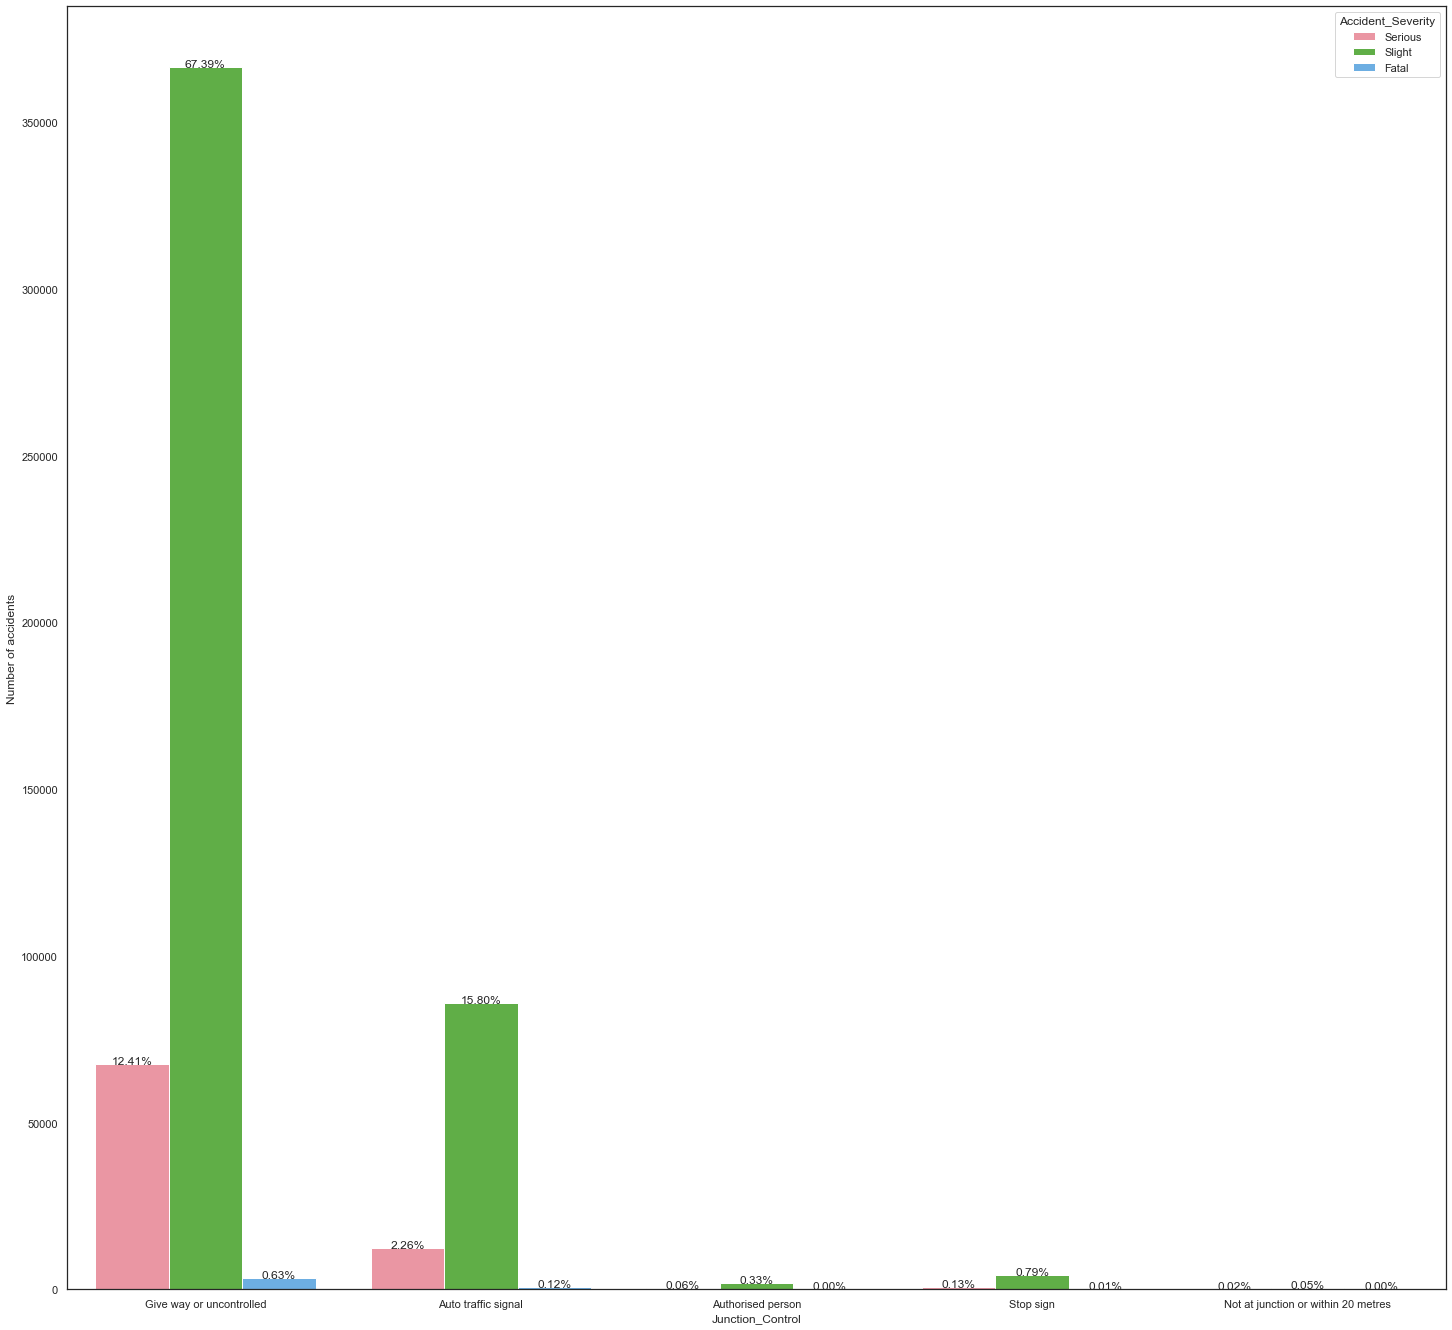

In [106]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Junction_Control", hue="Accident_Severity",data=df)
ax.set(xlabel="Junction_Control",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [107]:
zero3 = df[df['2nd_Road_Class'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [108]:
# prepare dataframe with simple counts
counts = df.groupby(['2nd_Road_Class', 'Accident_Severity']).size()

counts = counts.rename_axis(['2nd_Road_Class', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
2nd_Road_Class,,,
A,501,10915,79735
A(M),9,80,535
B,301,5256,30620
C,302,5084,31339
Motorway,67,615,4813
Not at junction or within 20 meters,60,631,3027
Unclassified,2890,58369,308681


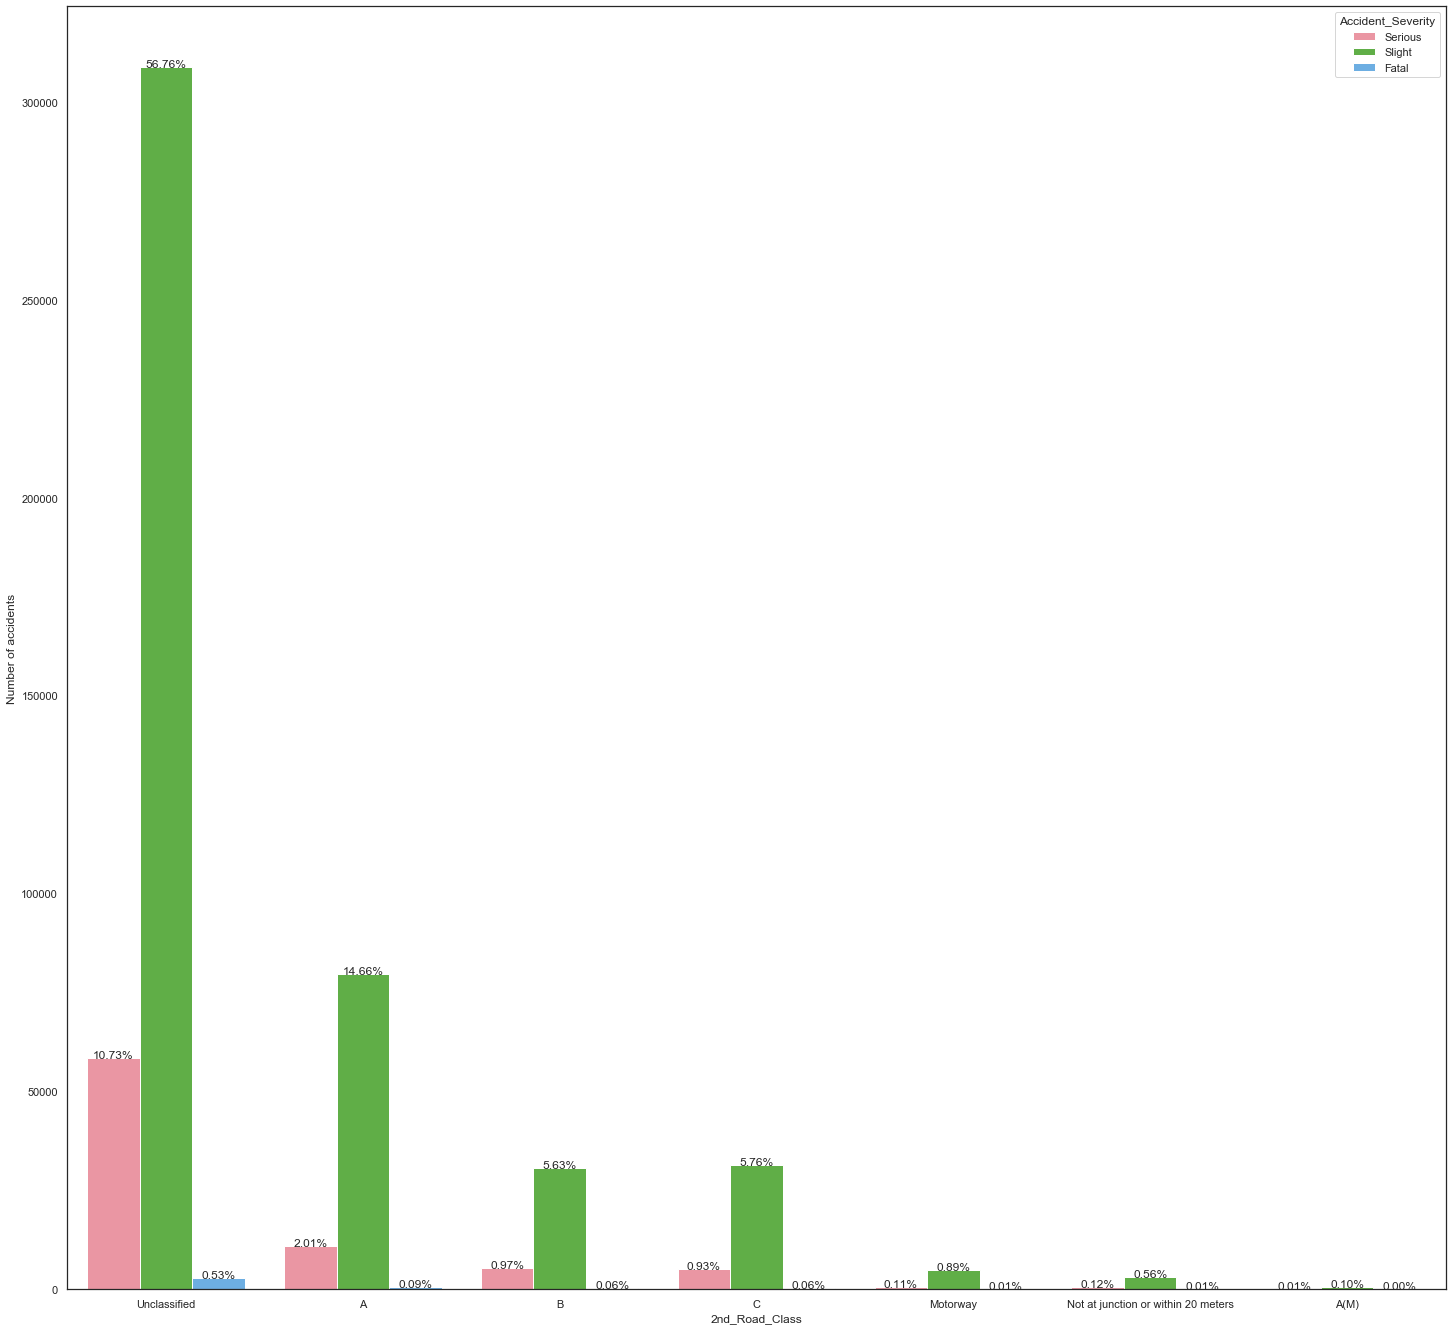

In [109]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="2nd_Road_Class", hue="Accident_Severity",data=df)
ax.set(xlabel="2nd_Road_Class",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [114]:
df['Number_of_Casualties'].value_counts()/df.shape[0]*100

1     79.427211
2     14.545722
3      3.979369
4      1.313278
5+     0.734421
Name: Number_of_Casualties, dtype: float64

In [115]:
# prepare dataframe with simple counts
counts = df.groupby(['Number_of_Casualties', 'Accident_Severity']).size()

counts = counts.rename_axis(['Number_of_Casualties', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Number_of_Casualties,,,
1,2819,64425,364705
2,772,10620,67712
3,284,3525,17832
4,136,1412,5594
5+,119,968,2907


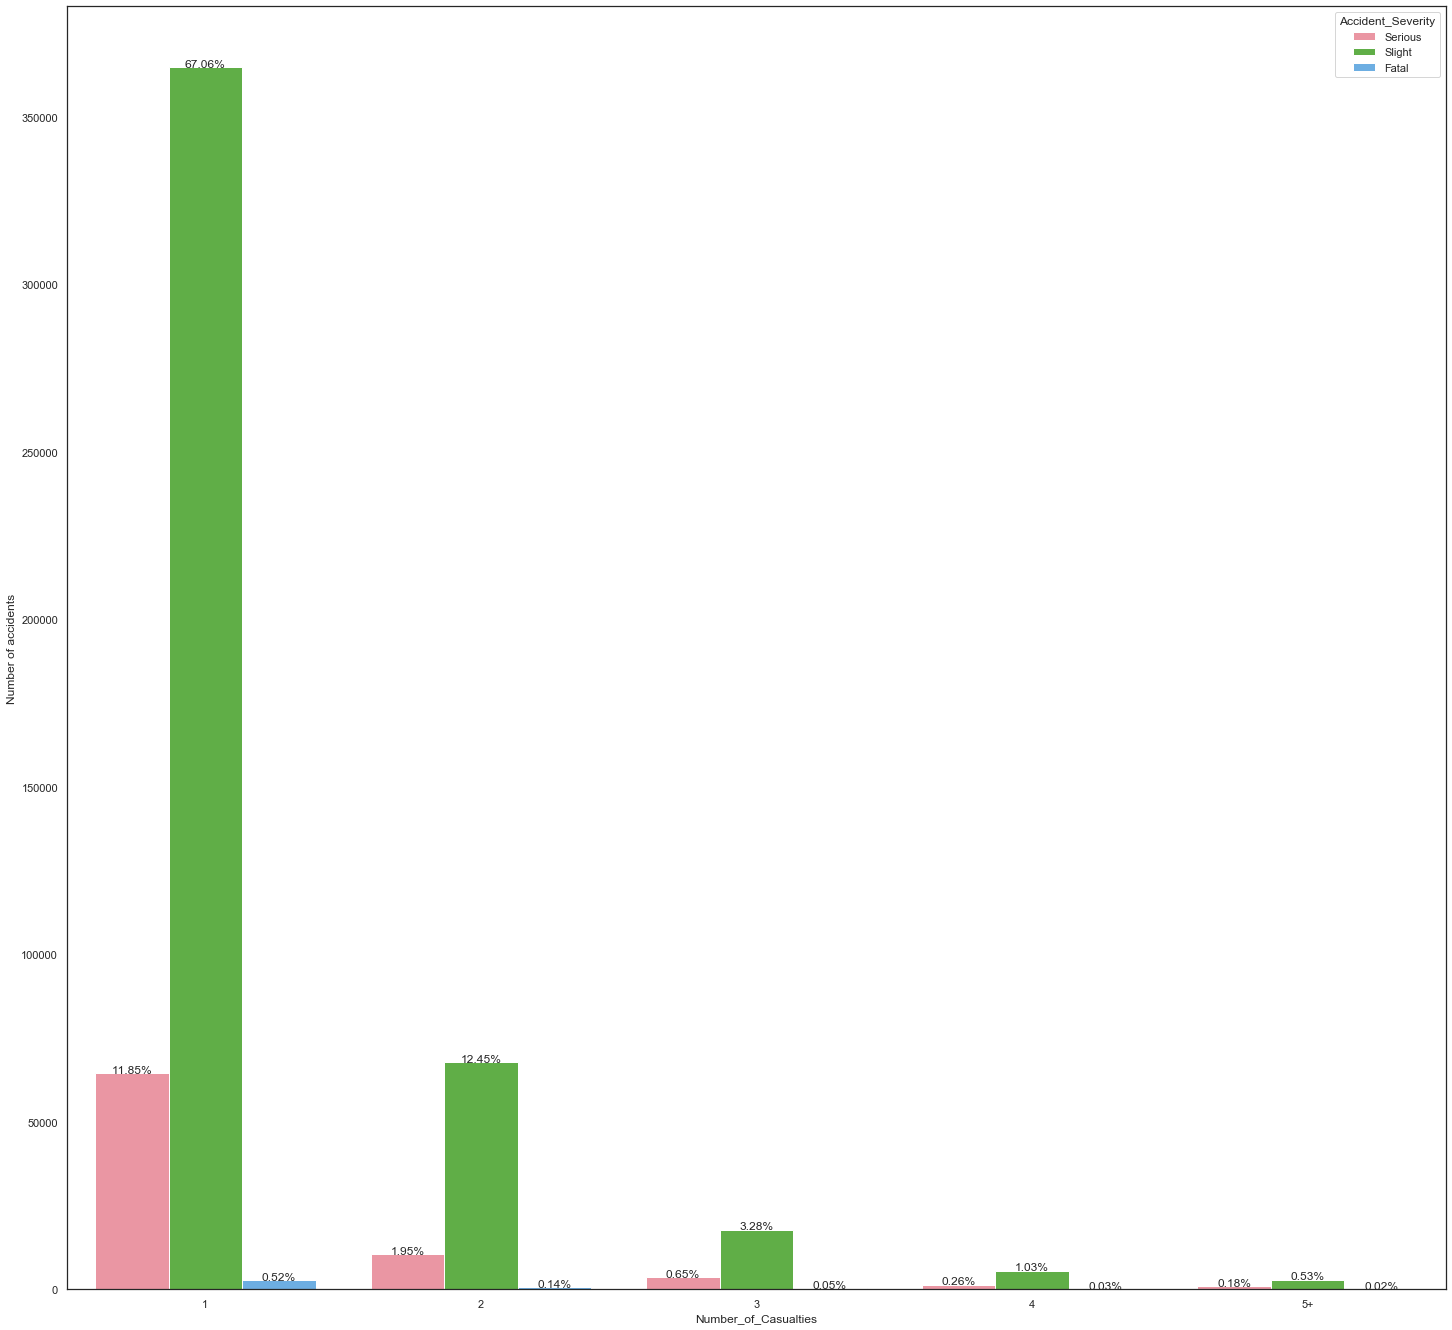

In [116]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Number_of_Casualties", hue="Accident_Severity",data=df)
ax.set(xlabel="Number_of_Casualties",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [117]:
zero3 = df[df['Weather_Conditions'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [118]:
# prepare dataframe with simple counts
counts = df.groupby(['Weather_Conditions', 'Accident_Severity']).size()

counts = counts.rename_axis(['Weather_Conditions', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,70,932,4857
Fine no high winds,3572,68887,385004
Fog or mist,22,317,1623
Other,46,1253,8083
Raining + high winds,40,922,5049
Raining no high winds,365,8345,51759
Snowing + high winds,2,49,410
Snowing no high winds,12,245,1953


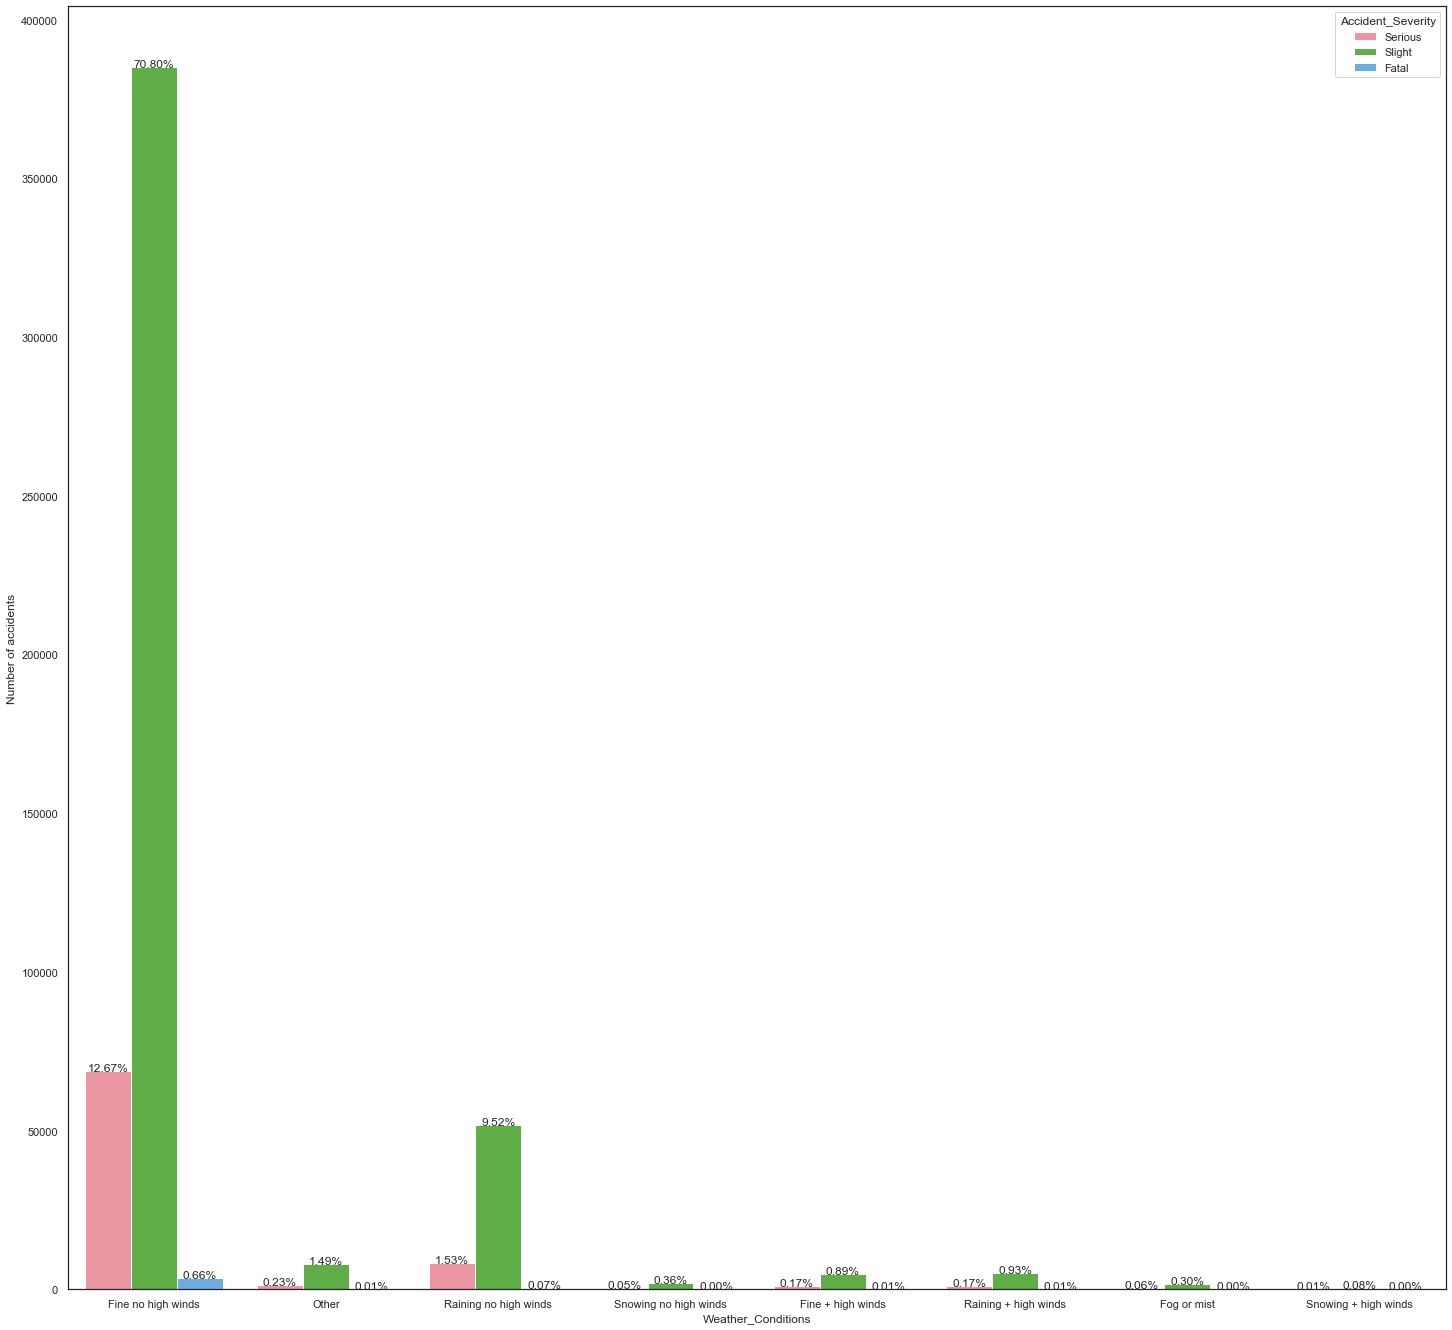

In [119]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Weather_Conditions", hue="Accident_Severity",data=df)
ax.set(xlabel="Weather_Conditions",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [120]:
zero3 = df[df['Light_Conditions'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [121]:
# prepare dataframe with simple counts
counts = df.groupby(['Light_Conditions', 'Accident_Severity']).size()

counts = counts.rename_axis(['Light_Conditions', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,67,1172,7248
Darkness - lights lit,1112,19868,102441
Darkness - lights unlit,40,531,2516
Darkness - no lighting,288,2377,8298
Daylight,2622,57002,338234


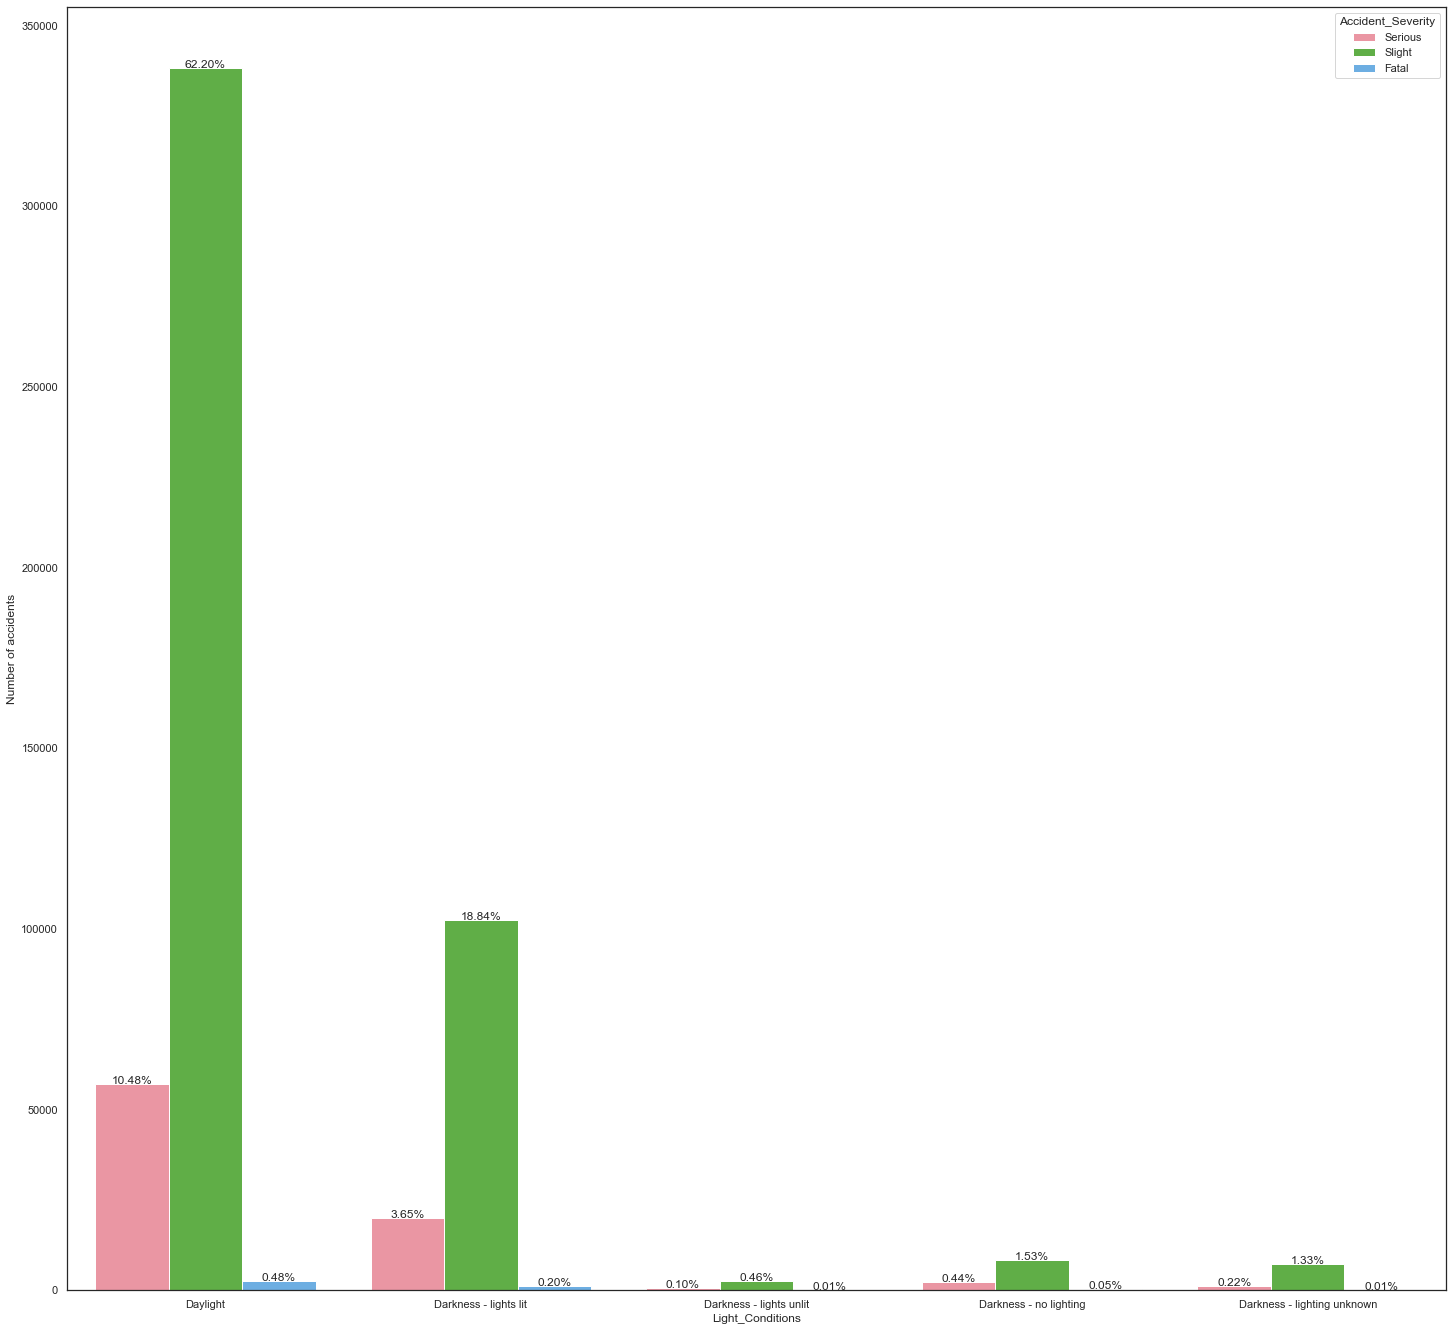

In [122]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Light_Conditions", hue="Accident_Severity",data=df)
ax.set(xlabel="Light_Conditions",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [123]:
zero3 = df[df['Day_of_Week'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [124]:
# prepare dataframe with simple counts
counts = df.groupby(['Day_of_Week', 'Accident_Severity']).size()

counts = counts.rename_axis(['Day_of_Week', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Day_of_Week,,,
Friday,661,13052,75539
Monday,550,11136,66072
Saturday,642,10839,57943
Sunday,598,9405,46498
Thursday,609,12221,71361
Tuesday,517,12158,70565
Wednesday,552,12139,70759


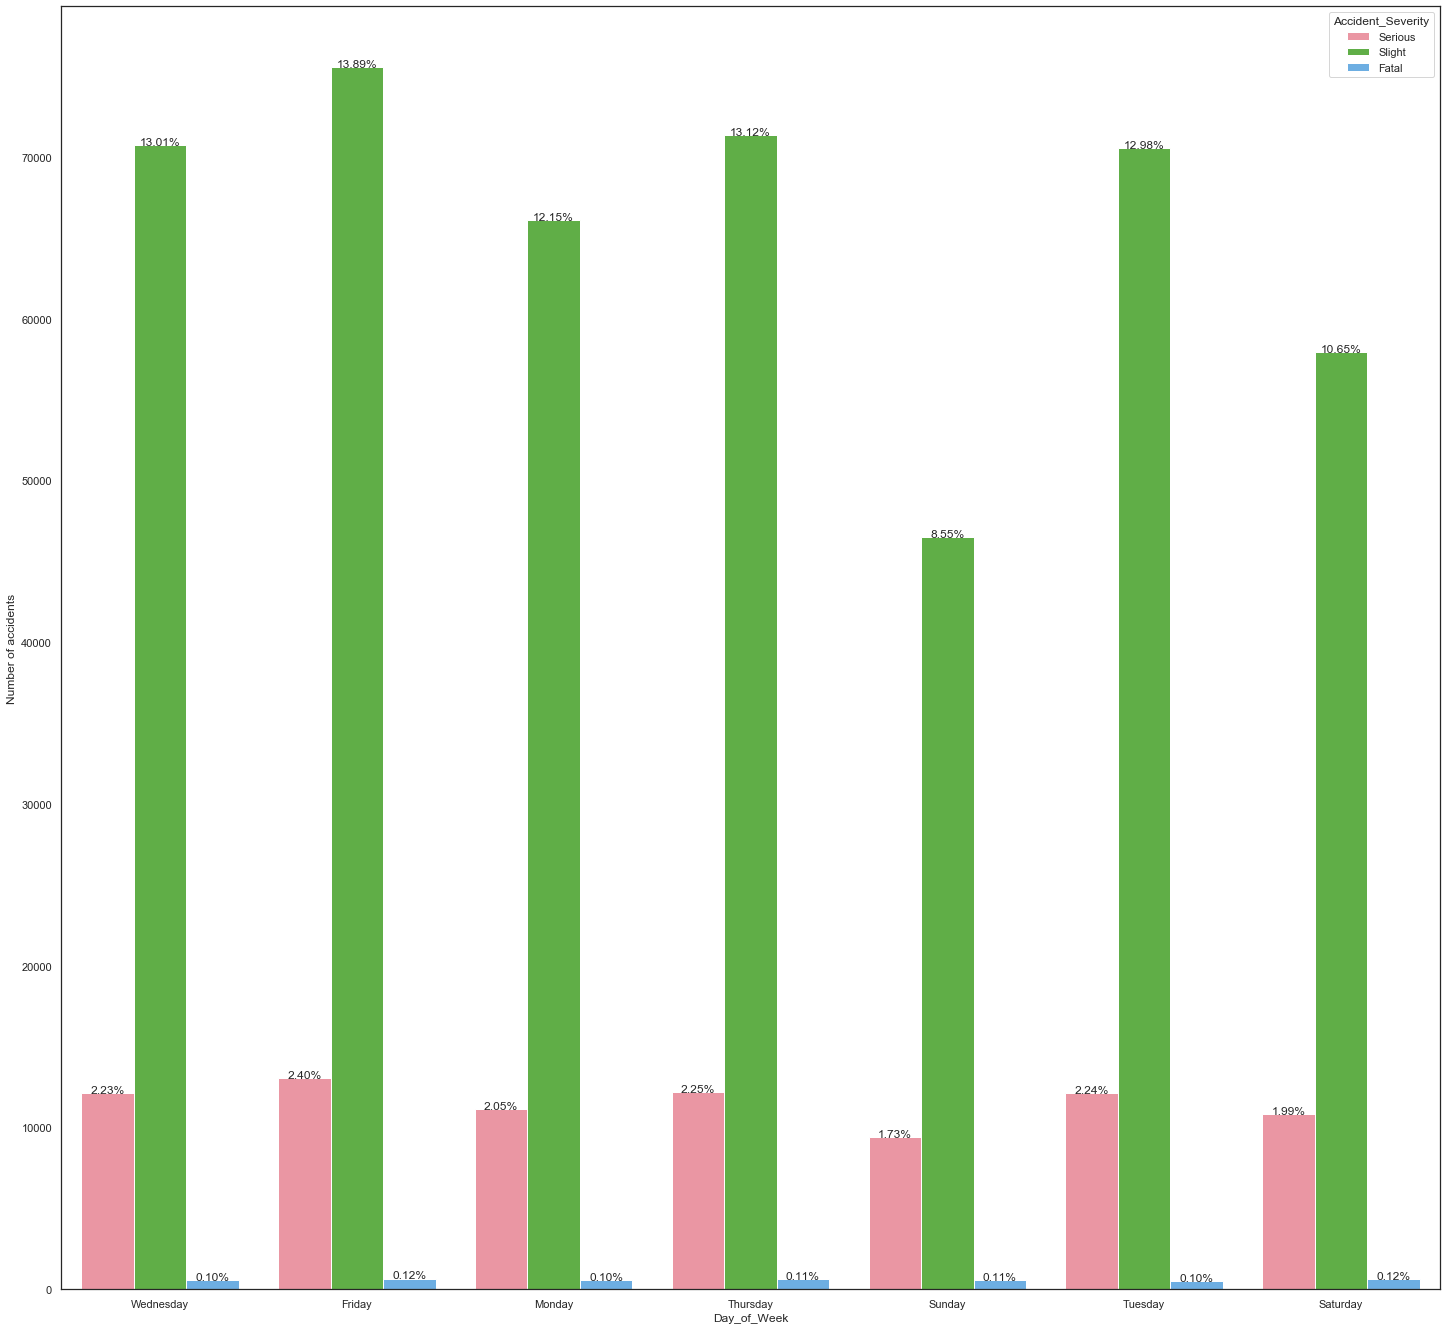

In [125]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Day_of_Week", hue="Accident_Severity",data=df)
ax.set(xlabel="Day_of_Week",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [126]:
zero3 = df[df['Road_Surface_Conditions'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [127]:
# prepare dataframe with simple counts
counts = df.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size()

counts = counts.rename_axis(['Road_Surface_Conditions', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Road_Surface_Conditions,,,
Dry,2992,59662,336118
Flood over 3cm. deep,3,32,214
Frost or ice,34,663,3912
Snow,8,173,1675
Wet or damp,1090,20220,114953


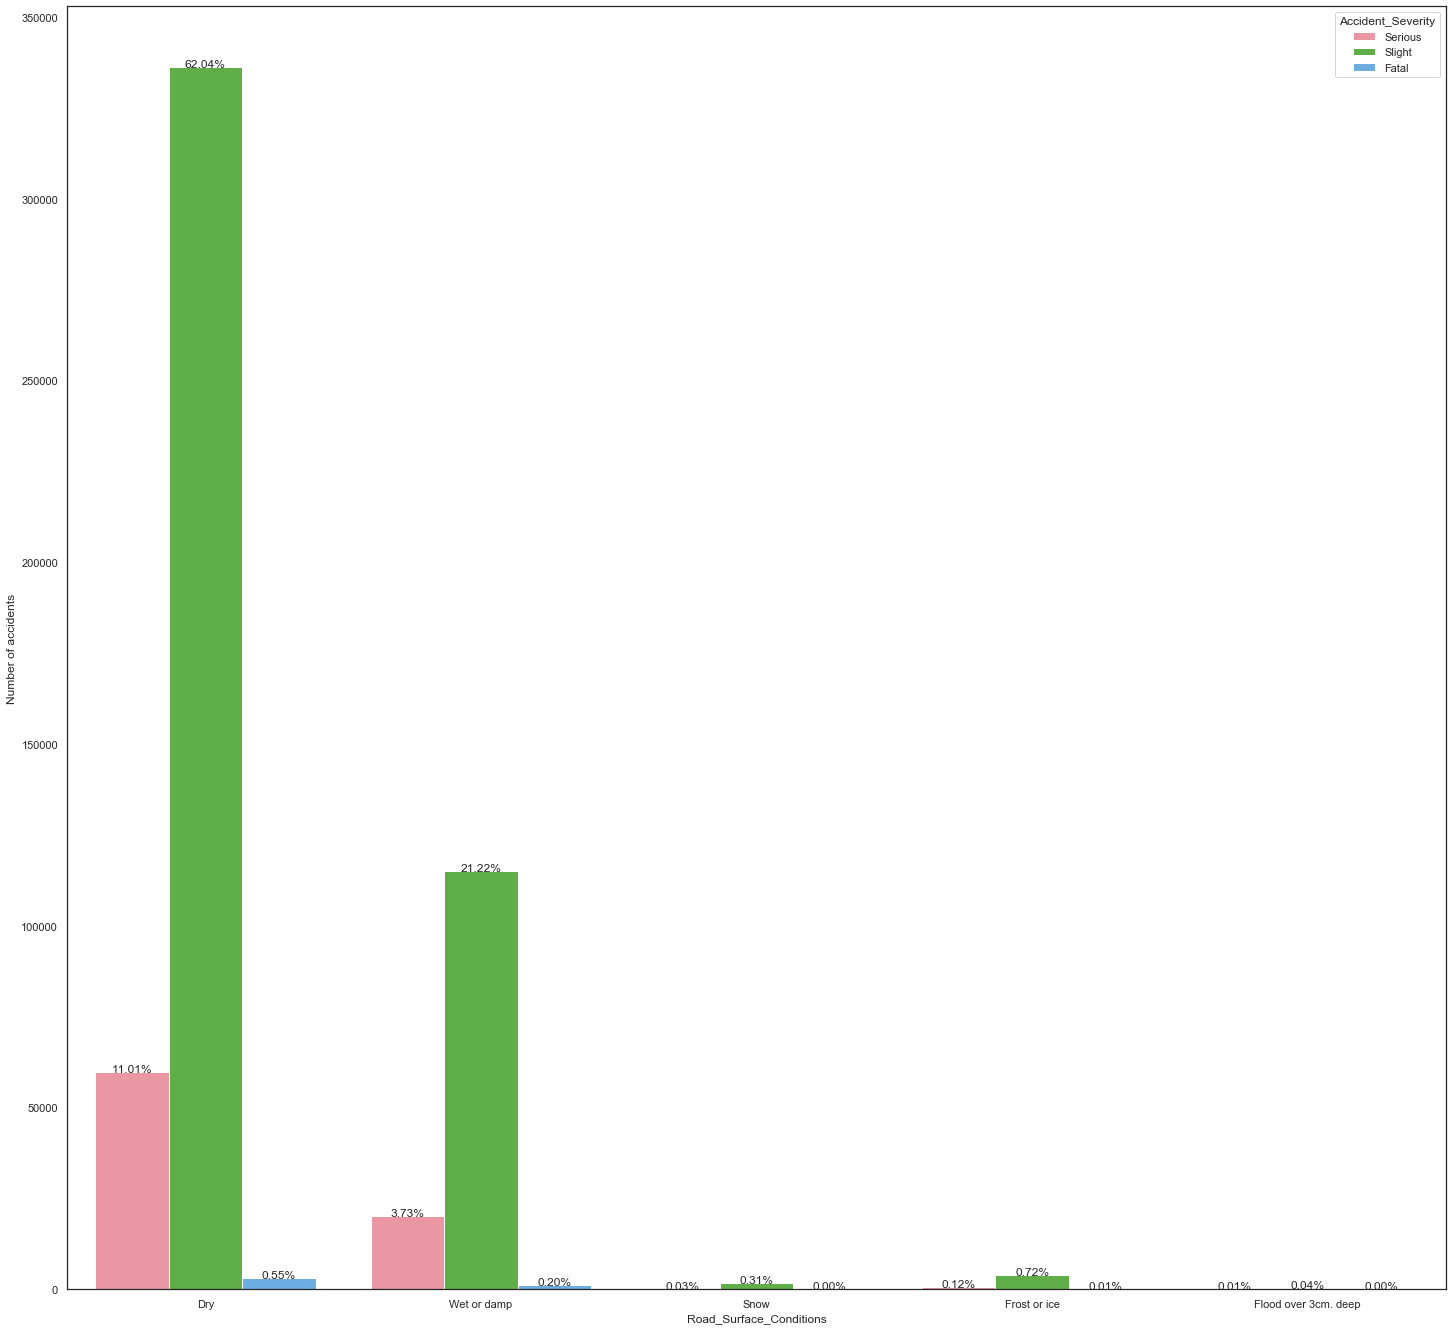

In [128]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Road_Surface_Conditions", hue="Accident_Severity",data=df)
ax.set(xlabel="Road_Surface_Conditions",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [129]:
zero3 = df[df['Carriageway_Hazards'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [130]:
# prepare dataframe with simple counts
counts = df.groupby(['Carriageway_Hazards', 'Accident_Severity']).size()

counts = counts.rename_axis(['Carriageway_Hazards', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Carriageway_Hazards,,,
Any animal in carriageway (except ridden horse),3,97,600
None,4063,79696,451482
Other object on road,33,531,2166
Pedestrian in carriageway - not injured,11,169,1076
Previous accident,7,77,325
Vehicle load on road,9,117,593


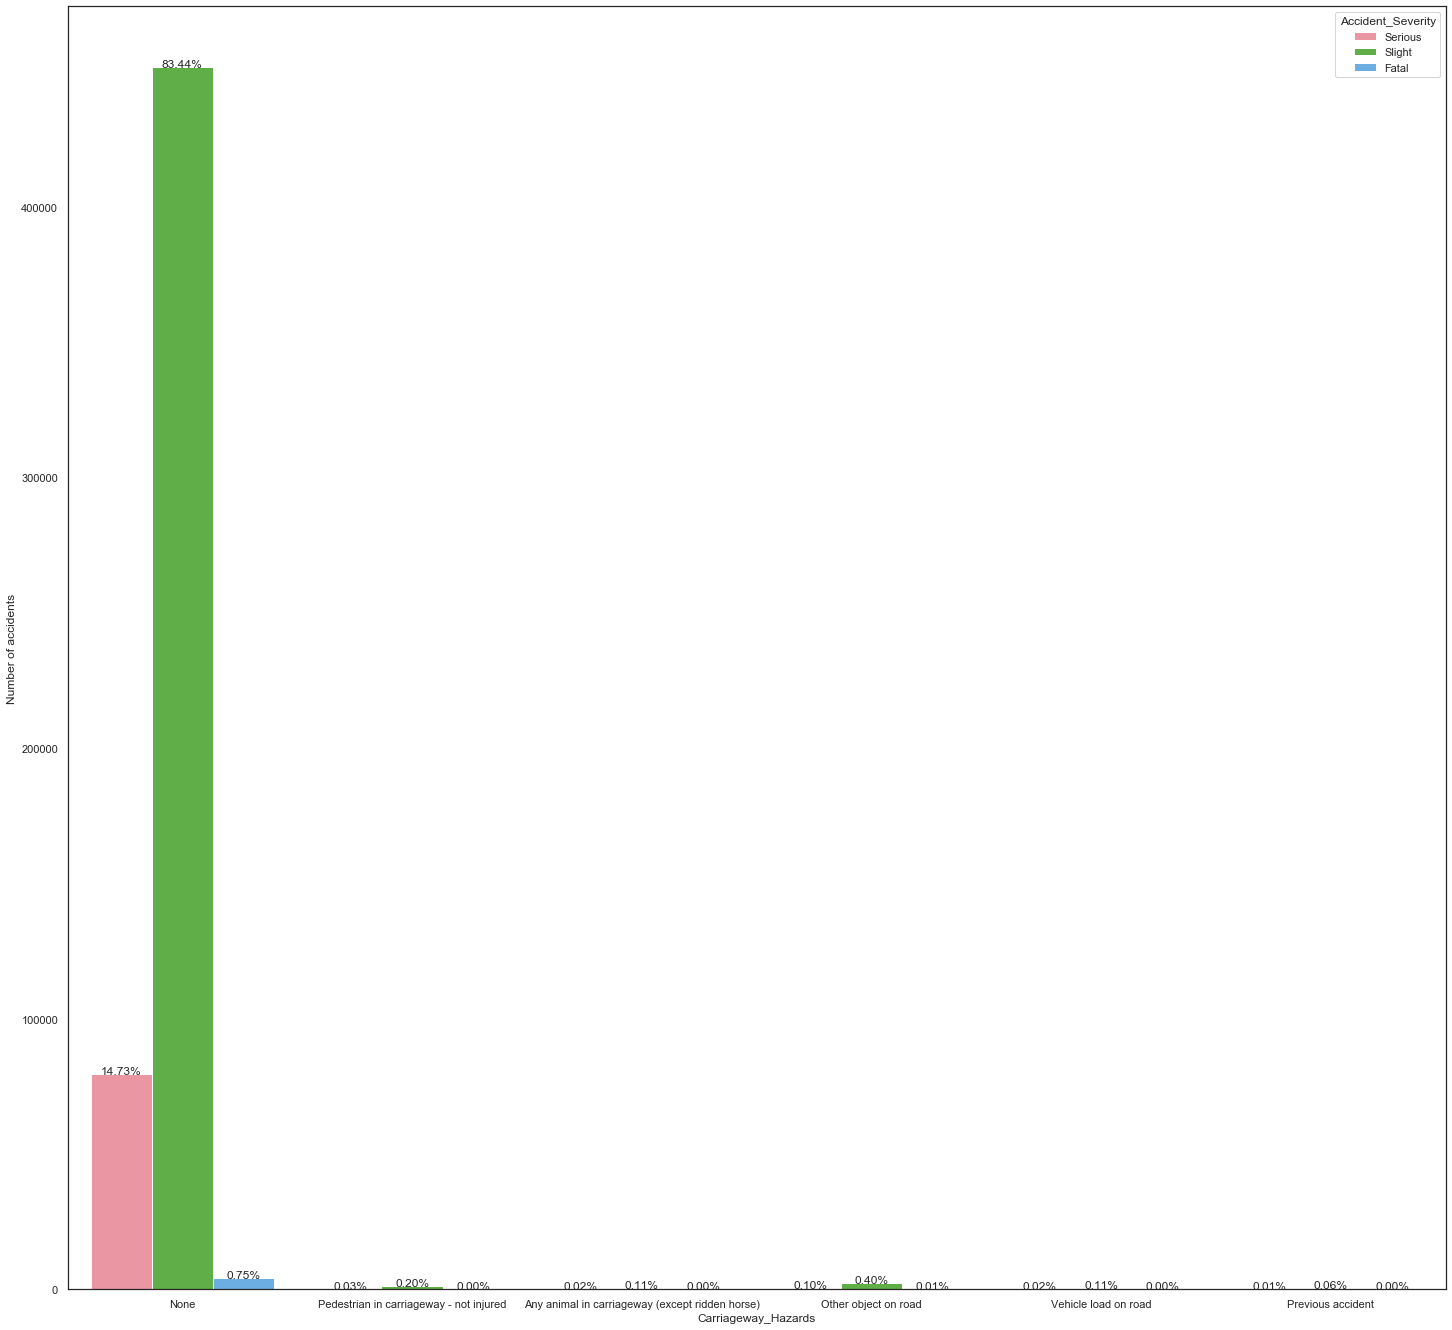

In [131]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Carriageway_Hazards", hue="Accident_Severity",data=df)
ax.set(xlabel="Carriageway_Hazards",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [144]:
zero3 = df[df['Special_Conditions_at_Site'] == 'Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [145]:
# prepare dataframe with simple counts
counts = df.groupby(['Special_Conditions_at_Site', 'Accident_Severity']).size()

counts = counts.rename_axis(['Special_Conditions_at_Site', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Special_Conditions_at_Site,,,
Auto signal part defective,3,36,244
Auto traffic singal - out,13,161,1128
Mud,2,98,380
None,4054,79154,447922
Oil or diesel,2,185,735
Road sign or marking defective or obscured,8,142,840
Road surface defective,7,208,513
Roadworks,36,645,3945


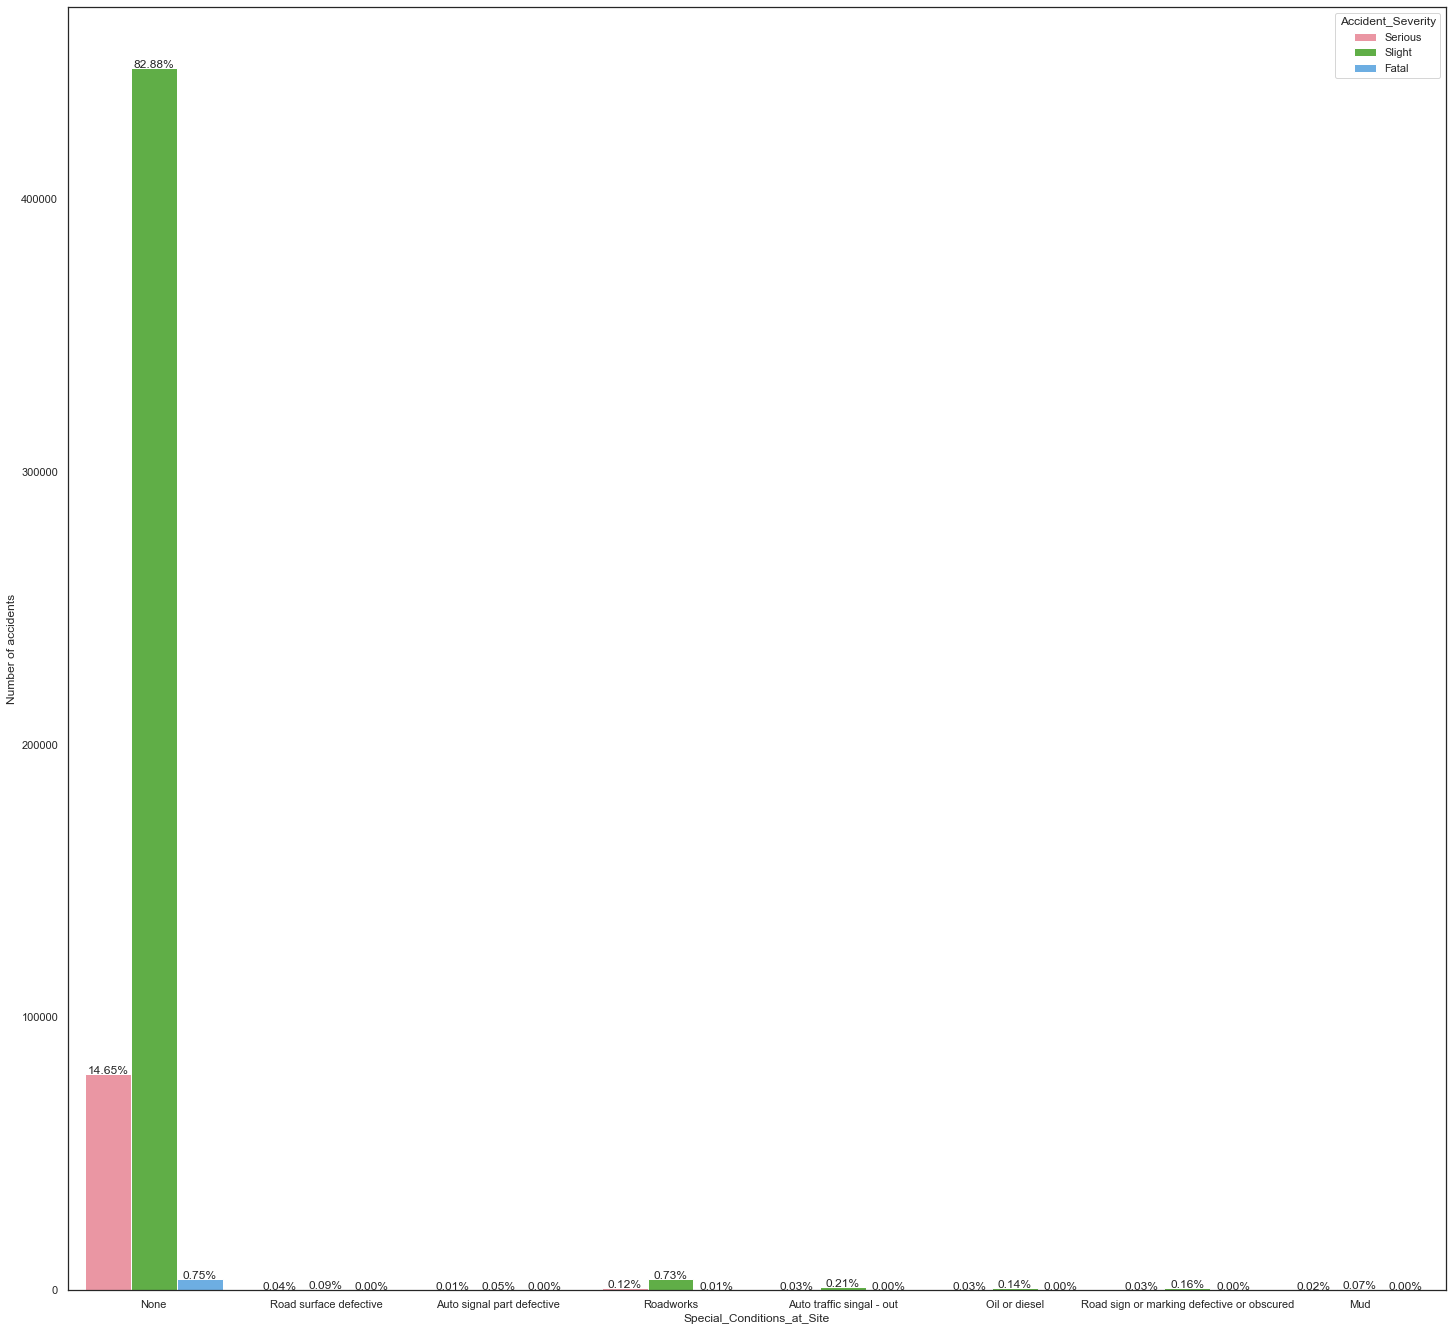

In [148]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Special_Conditions_at_Site", hue="Accident_Severity",data=df)
ax.set(xlabel="Special_Conditions_at_Site",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [154]:
# prepare dataframe with simple counts
counts = df.groupby(['Time', 'Accident_Severity']).size()

counts = counts.rename_axis(['Time', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Time,,,
After Work Rush,571,13924,78726
Afternoon,508,10900,62695
Day,467,7573,44818
Evening,757,16410,89103
Lunch Rush,497,8971,54333
Morning Rush,567,14139,87500
Night,758,8712,38532


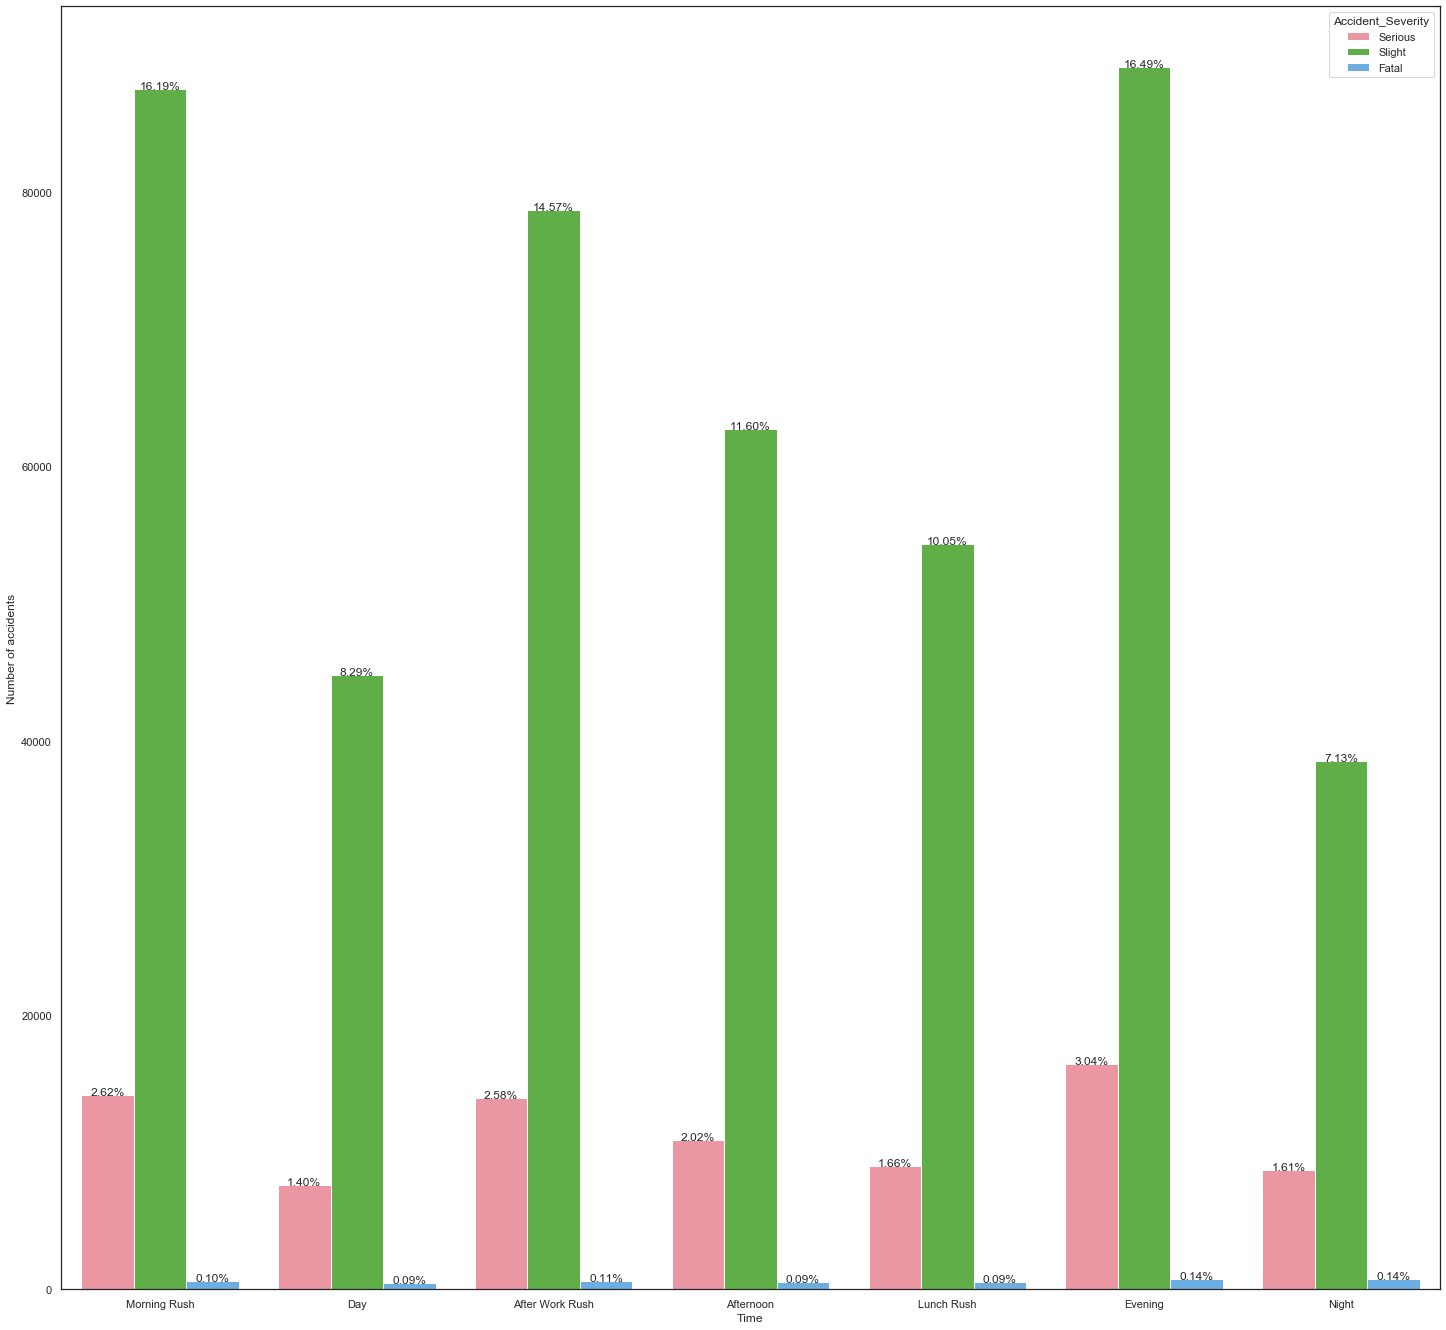

In [150]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Time", hue="Accident_Severity",data=df)
ax.set(xlabel="Time",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [161]:
zero3 = df[df['Urban_or_Rural_Area'] == 'Unallocated']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [162]:
# prepare dataframe with simple counts
counts = df.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size()

counts = counts.rename_axis(['Urban_or_Rural_Area', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,1801,22965,105129
Urban,2324,57658,350537


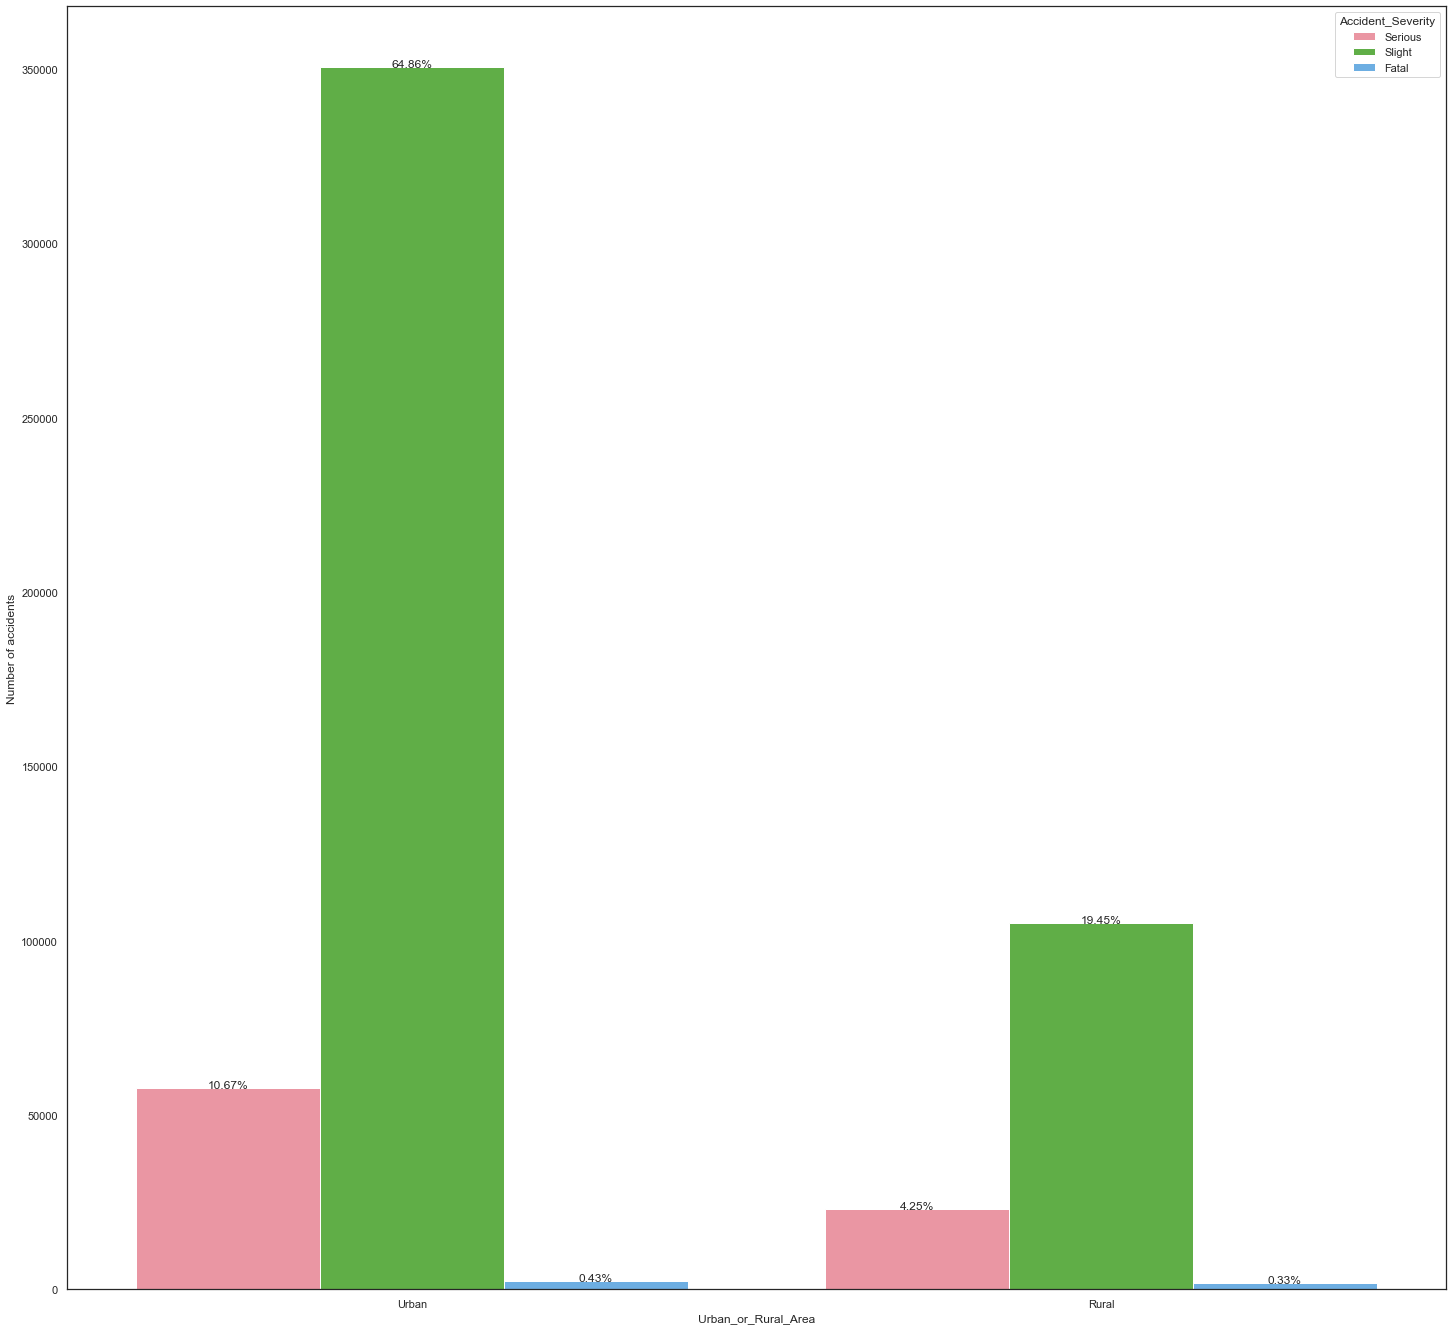

In [163]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Urban_or_Rural_Area", hue="Accident_Severity",data=df)
ax.set(xlabel="Urban_or_Rural_Area",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [166]:
zero3 = df[df['Did_Police_Officer_Attend_Scene_of_Accident'] =='Data missing or out of range']
create_count_percentages(zero3['Accident_Severity'])
df.drop(zero3.index, inplace=True)

In [167]:
# prepare dataframe with simple counts
counts = df.groupby(['Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Severity']).size()

counts = counts.rename_axis(['Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Did_Police_Officer_Attend_Scene_of_Accident,,,
No,224,10889,104123
No - accident was reported using a self completion form (self rep only),1,306,4868
Yes,3900,69427,346675


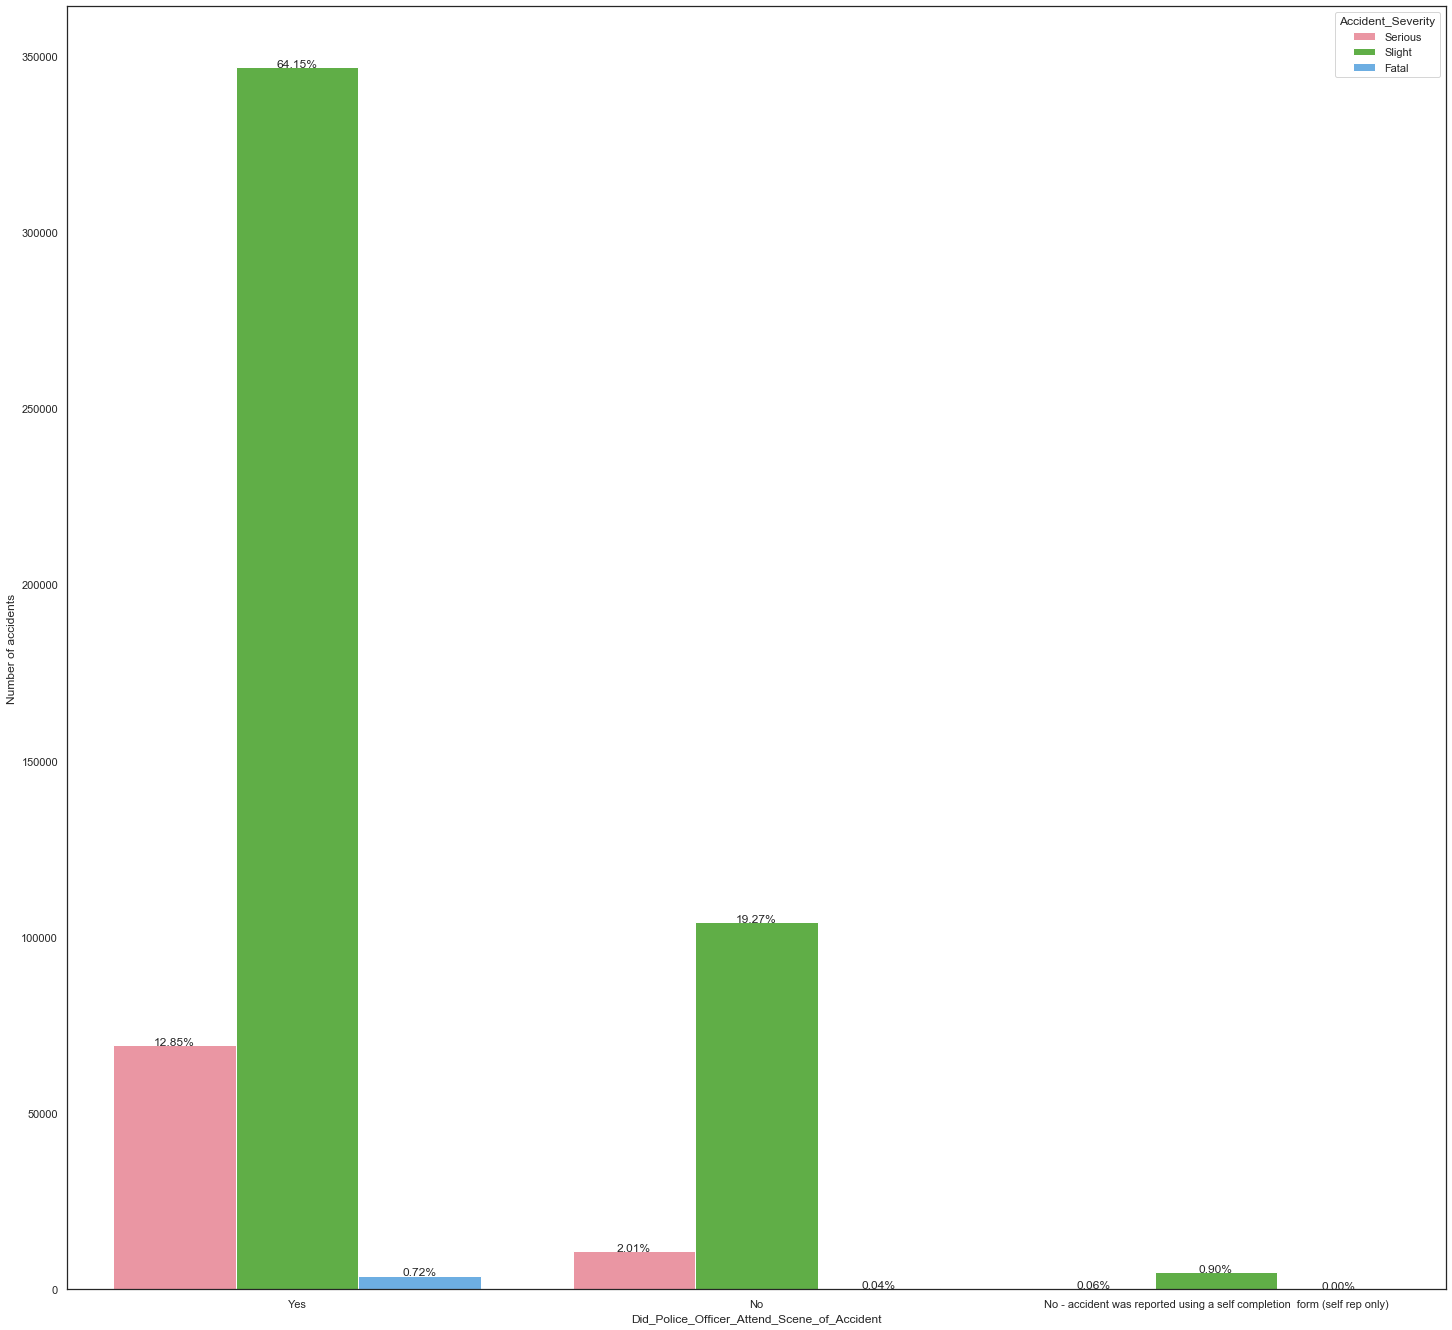

In [168]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Did_Police_Officer_Attend_Scene_of_Accident", hue="Accident_Severity",data=df)
ax.set(xlabel="Did_Police_Officer_Attend_Scene_of_Accident",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [155]:
# prepare dataframe with simple counts
counts = df.groupby(['Number_of_Vehicles', 'Accident_Severity']).size()

counts = counts.rename_axis(['Number_of_Vehicles', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({ 1:'Slight', 2:'Serious', 3:'Fatal'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Number_of_Vehicles,,,
1,1849,27060,93680
2,1800,47828,324731
3,344,4590,30786
4+,132,1151,6510


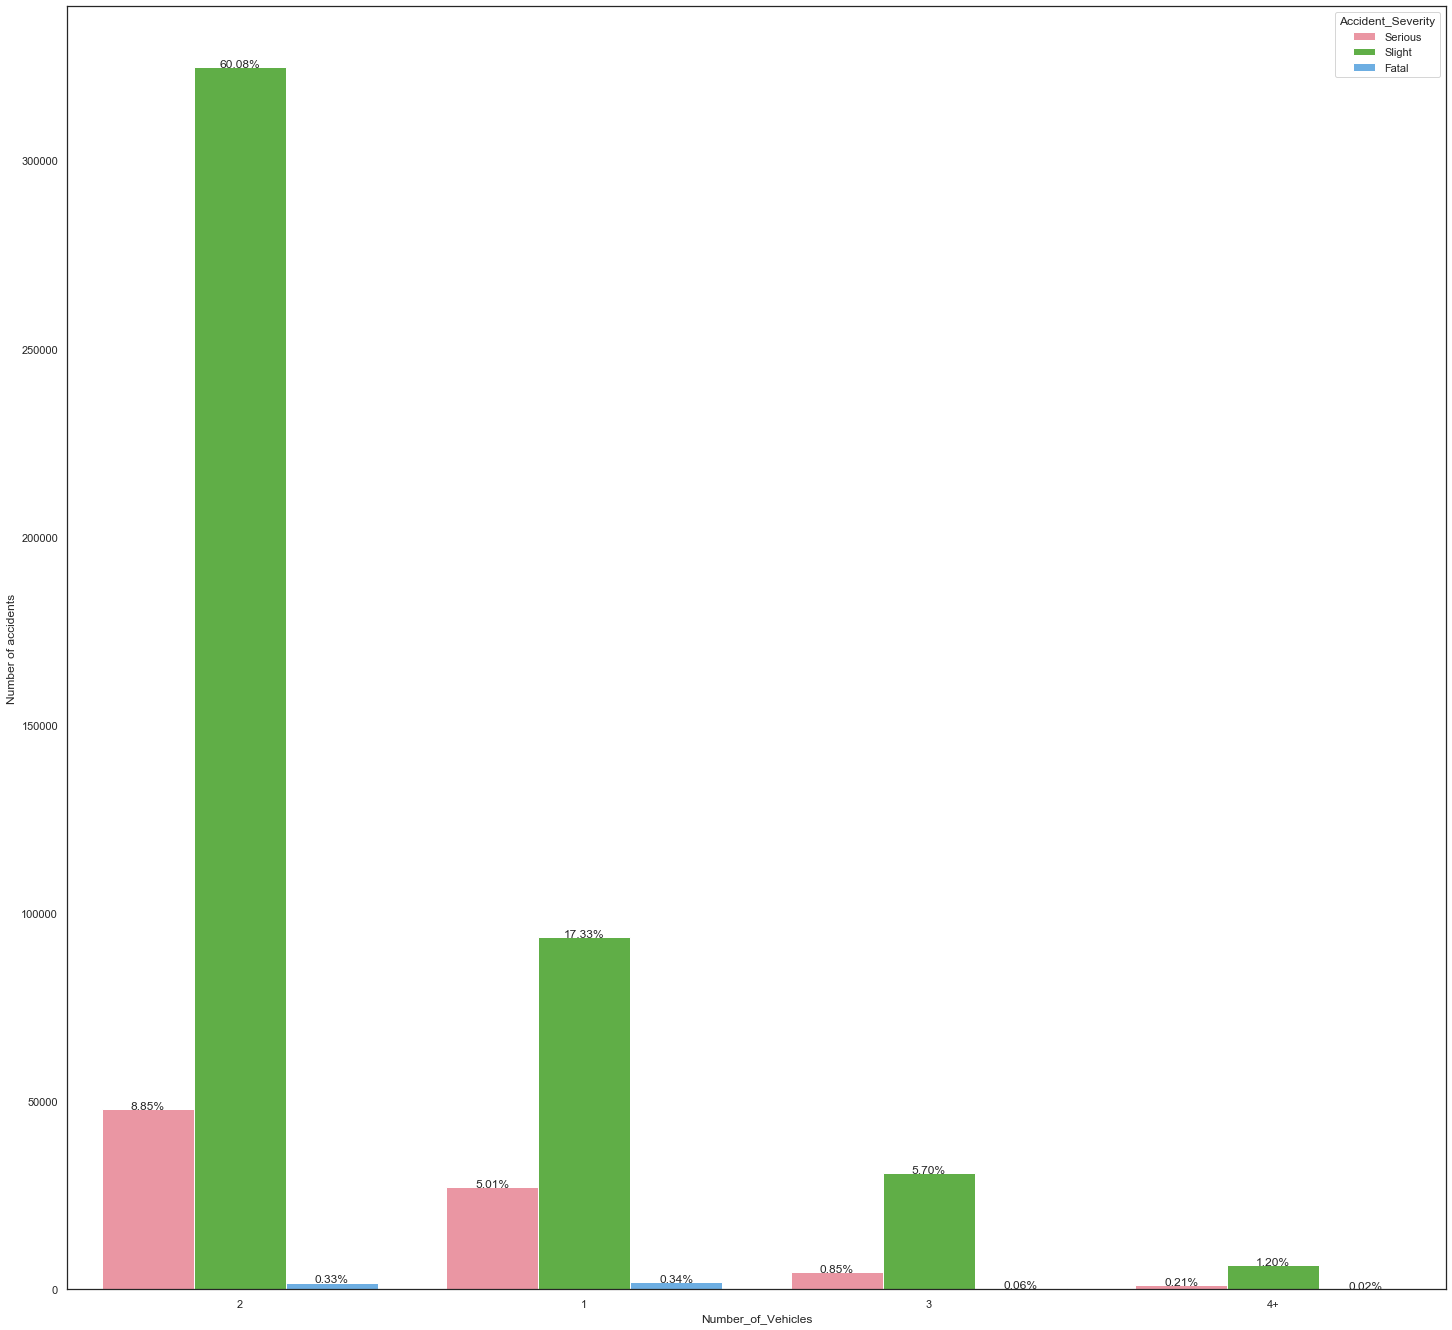

In [156]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(df))
ax=sns.countplot(x="Number_of_Vehicles", hue="Accident_Severity",data=df)
ax.set(xlabel="Number_of_Vehicles",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [134]:
df['Date'] = pd.to_datetime(df['Date'])

In [135]:
df['Month'] = df ['Date'].apply(lambda time: time.month)

In [136]:
#creating a weekend feature that includes Friday-Sunday
df['Weekend']= np.where(df['Day_of_Week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [137]:
#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [138]:
#pull time data and create hour column
df['Hour'] = df['Time'].str[0:2]
 
#convert to numeric    
df['Hour'] =  pd.to_numeric(df['Hour'])
# drop null values in our new column
df = df.dropna(subset=['Hour'])
#convert to integer
df['Hour'] = df['Hour'].astype('int')

In [139]:
#create time_of_day grouping

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

In [140]:
#apply function   
#time of day function
df['Time']= df['Hour'].apply(daygroup)   

In [141]:
df[['Weekend','Day_of_Week', 'Time']].tail(10)

,Weekend,Day_of_Week,Time
931768,0,Thursday,3
931771,0,Wednesday,5
931772,1,Saturday,7
931786,1,Sunday,7
931790,1,Sunday,4
931793,0,Tuesday,7
931798,0,Tuesday,5
931801,1,Saturday,2
931809,1,Friday,4
931810,1,Saturday,4


In [142]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"

timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['Time']=df['Time'].map(timeofdaygroups)

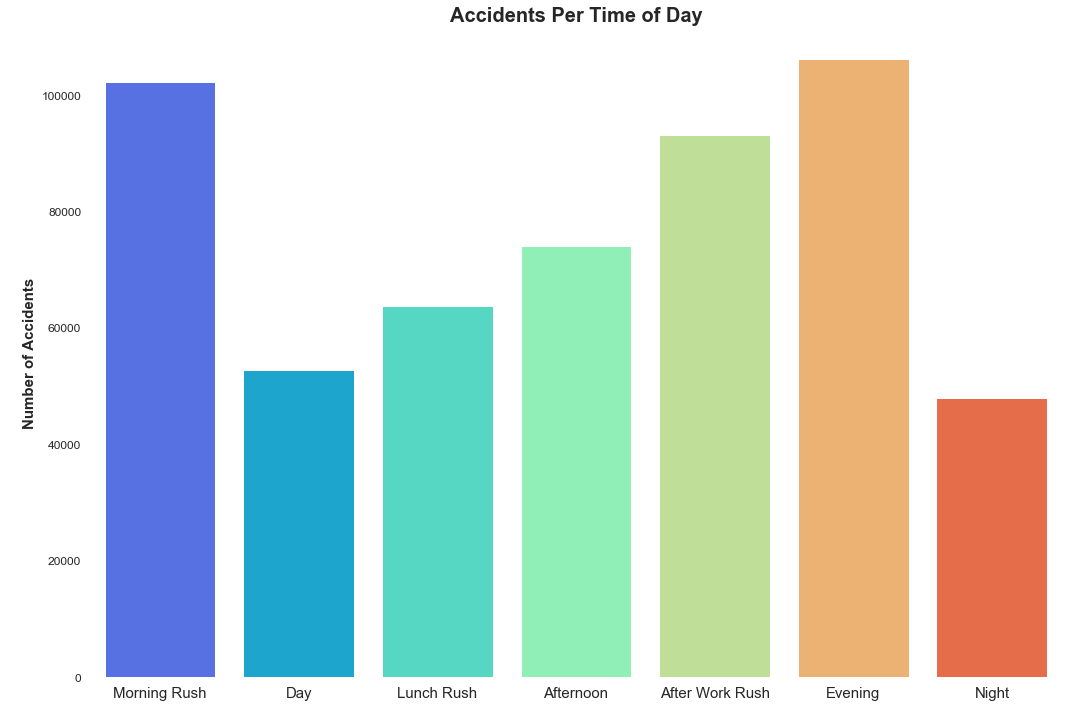

In [147]:
accidentspertod = df.groupby(['Time'])['Accident_Index'].count()

# prepare plot

plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')

In [153]:
# number_of_vehicles
df['Number_of_Vehicles'].value_counts()/df.shape[0]*100

2     69.266608
1     22.682303
3      6.609173
4+     1.441917
Name: Number_of_Vehicles, dtype: float64

In [152]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
#apply function   
df['Number_of_Vehicles']= df['Number_of_Vehicles'].apply(vehicles)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,931676.0,448719.670373,95223.507696,64084.000000,385595.750000,454321.500000,527830.000000,6.553910e+05
Location_Northing_OSGR,931676.0,287090.074563,156158.186217,10235.000000,176240.000000,234526.000000,389895.000000,1.209512e+06
Longitude,931666.0,-1.303997,1.397654,-7.525273,-2.216286,-1.198030,-0.157639,1.759641e+00
Latitude,931666.0,52.471219,1.406383,49.912362,51.472559,51.995472,53.402768,6.076372e+01
Police_Force,931812.0,29.387810,25.127395,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,931812.0,2.812894,0.420662,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,931812.0,1.838891,0.714009,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,931812.0,1.320511,0.792298,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,931812.0,4.105456,1.919295,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),931812.0,338.200680,258.428861,1.000000,100.000000,309.000000,516.000000,9.410000e+02


In [18]:
df.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                            136
Location_Northing_OSGR                           136
Longitude                                        146
Latitude                                         146
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                             107
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                       37
Junction_Detail                               

In [19]:
#let's take a closer look at nulls within columns
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum() 

Location_Easting_OSGR          136
Location_Northing_OSGR         136
Longitude                      146
Latitude                       146
Time                           107
Speed_limit                     37
LSOA_of_Accident_Location    55579
dtype: int64

Accident_severity has no null values , which is great because that is our target variable.

We will need to drop variables that are unnecessary: -since we have latitude and longitude, the following are redundant: -1st_Road_Number -2nd_Road_Number -LSOA_of_Accident_Location -Location_Easting_OSGR -Location_Northing_OSGR

We will need to drop variables that mostly contain missing values

For variables that contain only a few missing values, we can either drop those records or replace them. Let's drop for now. (Typically, we would substitute numeric nulls with mean/median/mode. However, given the low volume of nulls and our need to make accurate recommendations to the UK government with as little assumptions as possible, we can safely drop records that still contain nulls.)

In [20]:
#drop variables that are unnecessary
df.drop("1st_Road_Number", axis=1, inplace=True)
df.drop("2nd_Road_Number", axis=1, inplace=True)
df.drop("LSOA_of_Accident_Location", axis=1, inplace=True)
df.drop("Location_Easting_OSGR", axis=1, inplace=True)
df.drop("Location_Northing_OSGR", axis=1, inplace=True)

In [21]:
#check columns
print("Accident's Columns:\n",df.columns, "\n")

Accident's Columns:
 Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object') 



# Cleaning the dataset¶

In [22]:
#convert date/time to datetime datatype
df['Date']= pd.to_datetime(df['Date'], format="%d/%m/%Y")


In [23]:
df['Date']= pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [24]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
        'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
        '1st_Road_Class', 'Road_Type', 'Junction_Detail', 'Junction_Control',
        '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
        'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
        'Weather_Conditions', 'Road_Surface_Conditions',
        'Special_Conditions_at_Site', 'Carriageway_Hazards',
        'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
       dtype='object'),
 dtype('float64'): Index(['Longitude', 'Latitude', 'Speed_limit'], dtype='object'),
 dtype('<M8[ns]'): Index(['Date'], dtype='object'),
 dtype('O'): Index(['Accident_Index', 'Time', 'Local_Authority_(Highway)'], dtype='object')}

# Correcting dtypes and labels
A lot of the data uses numerical labeling, so majority of the cleaning will be checking these datatypes and assinging the correct labels according to the data dictionary.

In [25]:
df.Accident_Severity.value_counts()

3    769046
2    151184
1     11582
Name: Accident_Severity, dtype: int64

In [26]:
# Change values to listed meanings
df.Accident_Severity = df.Accident_Severity.replace([1,2,3], ['Fatal', 'Serious', 'Slight'])

In [27]:
df.Accident_Severity.value_counts()

Slight     769046
Serious    151184
Fatal       11582
Name: Accident_Severity, dtype: int64

In [28]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
        'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class',
        'Road_Type', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
        'Pedestrian_Crossing-Human_Control',
        'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
        'Weather_Conditions', 'Road_Surface_Conditions',
        'Special_Conditions_at_Site', 'Carriageway_Hazards',
        'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
       dtype='object'),
 dtype('float64'): Index(['Longitude', 'Latitude', 'Speed_limit'], dtype='object'),
 dtype('<M8[ns]'): Index(['Date'], dtype='object'),
 dtype('O'): Index(['Accident_Index', 'Accident_Severity', 'Time',
        'Local_Authority_(Highway)'],
       dtype='object')}

In [29]:
df.Police_Force.value_counts(normalize=True)

1     0.188169
20    0.042183
46    0.035912
13    0.034649
43    0.034562
44    0.031583
47    0.030534
50    0.027638
6     0.027149
45    0.026759
42    0.026533
4     0.026511
97    0.024540
52    0.022838
14    0.021377
10    0.020692
31    0.019463
5     0.018634
16    0.018238
41    0.017558
7     0.017057
21    0.016441
22    0.016063
32    0.015356
33    0.014830
35    0.014776
30    0.014764
62    0.014678
12    0.013971
95    0.013742
36    0.013380
55    0.011959
37    0.011699
40    0.011194
54    0.010911
23    0.010495
3     0.009398
63    0.009139
34    0.008861
60    0.008685
11    0.007896
53    0.006070
17    0.005876
61    0.005403
92    0.004504
93    0.003495
91    0.003361
96    0.003241
94    0.002855
48    0.002402
98    0.001977
Name: Police_Force, dtype: float64

In [30]:
# Change Police_Force to proper labels
df.Police_Force = df.Police_Force.replace([1,3,4,5,6,7,10,11,12,13,14,16,17,20,21,22,23,30,31,32,33,34,35,36,37,
                                           40,41,42,43,44,45,46,47,48,50,52,53,54,55,60,61,62,63,91,92,93,94,95,96,97,98], 
                                                                    ['Metropolitan Police','Cumbria','Lancashire','Merseyside',
                                                                     'Greater Manchester','Cheshire','Northumbria','Durham','North Yorkshire',
                                                                     'West Yorkshire','South Yorkshire','Humberside','Cleveland',
                                                                     'West Midlands','Staffordshire','West Mercia',
                                                                     'Warwickshire','Derbyshire','Nottinghamshire','Lincolnshire',
                                                                     'Leicestershire','Northamptonshire','Cambridgeshire',
                                                                     'Norfolk','Suffolk','Bedfordshire',
                                                                     'Hertfordshire','Essex','Thames Valley',
                                                                     'Hampshire','Surrey','Kent','Sussex','City of London', 
                                                                     'Devon and Cornwall','Avon and Somerset','Gloucestershire',
                                                                     'Wiltshire','Dorset','North Wales','Gwent',
                                                                     'South Wales','Dyfed-Powys','Northern','Grampian',
                                                                     'Tayside','Fife','Lothian and Borders','Central','Strathclyde',
                                                                     'Dumfries and Galloway'])
df.Police_Force.value_counts(normalize=True)

Metropolitan Police      0.188169
West Midlands            0.042183
Kent                     0.035912
West Yorkshire           0.034649
Thames Valley            0.034562
Hampshire                0.031583
Sussex                   0.030534
Devon and Cornwall       0.027638
Greater Manchester       0.027149
Surrey                   0.026759
Essex                    0.026533
Lancashire               0.026511
Strathclyde              0.024540
Avon and Somerset        0.022838
South Yorkshire          0.021377
Northumbria              0.020692
Nottinghamshire          0.019463
Merseyside               0.018634
Humberside               0.018238
Hertfordshire            0.017558
Cheshire                 0.017057
Staffordshire            0.016441
West Mercia              0.016063
Lincolnshire             0.015356
Leicestershire           0.014830
Cambridgeshire           0.014776
Derbyshire               0.014764
South Wales              0.014678
North Yorkshire          0.013971
Lothian and Bo

In [31]:
df['Local_Authority_(District)'].value_counts(normalize=True)

300    0.020166
204    0.013242
1      0.011752
9      0.009376
596    0.009110
         ...   
915    0.000409
57     0.000275
941    0.000193
936    0.000162
933    0.000143
Name: Local_Authority_(District), Length: 380, dtype: float64

In [32]:
# Change Local_Authority_(District) to proper labels
df['Local_Authority_(District)']= df['Local_Authority_(District)'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
                                                                            22,23,24,25,26,27,28,29,30,31,32,33,38,40,57,60,61,62,63,64,65,70,71,72,73,74,75,76,77,79,80,82,83,
                                                                            84,85,90,91,92,93,95,100,101,102,104,106,107,109,110,112,114,120,121,122,123,124,126,127,128,129,130,
                                                                            139,140,141,142,143,144,145,146,147,148,149,150,160,161,162,163,164,165,166,168,
                                                                            169,180,181,182,184,185,186,187,189,200,202,203,204,206,210,211,213,215,228,231,232,233,240,241,243
                                                                            ,245,250,251,252,253,254,255,256,257,258,270,273,
                                                                            274,276,277,278,279,280,281,282,283,284,285,286,290,291,292,293,294,300,302,303,305,306,307,309,320,321,322,323,324,
                                                                            325,327,328,329,340,341,342,343,344,345,346,347,350,351,352,353,354,355,356,360,361,362,363,364,365,366,367,368,380,381,
                                                                            382,383,384,385,386,390,391,392,393,394,395,400,401,402,404,405,406,407,410,411,412,413,414,
                                                                            415,416,420,421,422,423,424,430,431,432,433,434,435,
                                                                            436,437,438,450,451,452,453,454,455,456,457,458,459,460,461,462,463,470,471,472,473,474,475,476,477,478,479,
                                                                            480,481,482,483,484,
                                                                            485,490,491,492,493,494,495,496,497,498,499,500,
                                                                            501,502,505,510,511,512,513,514,515,516,517,518,530,531,532,533,535,536,538,539,540,541,542,543,544,551,552,554,555,
                                                                            556,557,558,559,560,562,563,564,565,
                                                                            570,580,581,582,583,584,585,586,587,588,589,590,591,
                                                                            592,593,594,595,596,601,605,606,607,608,609,610,611,
                                                                            612,620,621,622,623,624,625,630,631,632,633,634,635,
                                                                            640,641,642,643,644,645,646,647,720,721,722,723,724,
                                                                            725,730,731,732,733,734,740,741,742,743,744,745,746,750,751,752,
                                                                            753,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,
                                                                            931,932,933,934,935,936,937,938,939,940,941], 
                                                                    ['Westminster','Camden','Islington','Hackney','Tower Hamlets'
                                                                     ,'Greenwich','Lewisham','Southwark',
                                                                     'Lambeth','Wandsworth','Hammersmith and Fulham',
                                                                     'Kensington and Chelsea','Waltham Forest',
                                                                     'Redbridge','Havering','Barking and Dagenham'
                                                                     ,'Newham','Bexley','Bromley','Croydon','Sutton',
                                                                     'Merton','Kingston upon Thames','Richmond upon Thames'
                                                                     ,'Hounslow','Hillingdon','Ealing','Brent','Harrow'
                                                                     ,'Barnet','Haringey','Enfield','Hertsmere',
                                                                     'Epsom and Ewell','Spelthorne','London Airport (Heathrow)',
                                                                     'Allerdale','Barrow-in-Furness','Carlisle','Copeland','Eden','South Lakeland',
                                                                     'Blackburn with Darwen','Blackpool','Burnley','Chorley',
                                                                     'Fylde','Hyndburn','Lancaster','Pendle','Preston','Ribble Valley','Rossendale',
                                                                     'South Ribble','West Lancashire','Wyre','Knowsley',
                                                                     'Liverpool','St. Helens','Sefton','Wirral','Bolton','Bury','Manchester','Oldham','Rochdale','Salford','Stockport','Tameside',
                                                                     'Trafford','Wigan','Chester','Congleton','Crewe and Nantwich',
                                                                     'Ellesmere Port and Neston','Halton','Macclesfield','Vale Royal','Warrington',
                                                                     'Cheshire East','Cheshire West and Chester','Northumberland','Alnwick',
                                                                     'Berwick-upon-Tweed','Blyth Valley','Castle Morpeth','Tynedale','Wansbeck','Gateshead',
                                                                     'Newcastle upon Tyne',
                                                                     'North Tyneside','South Tyneside','Sunderland',
                                                                     'Chester-le-Street','Darlington','Derwentside','Durham','Easington','Sedgefield',
                                                                     'Teesdale','Wear Valley','County Durham','Craven','Hambleton','Harrogate','Richmondshire','Ryedale',
                                                                     'Scarborough','Selby','York','Bradford','Calderdale','Kirklees','Leeds','Wakefield','Barnsley',
                                                                     'Doncaster','Rotherham','Sheffield','Kingston upon Hull, City of','East Riding of Yorkshire',
                                                                     'North Lincolnshire','North East Lincolnshire','Hartlepool','Redcar and Cleveland','Middlesbrough','Stockton-on-Tees',
                                                                     'Cannock Chase','East Staffordshire','Lichfield','Newcastle-under-Lyme','South Staffordshire','Stafford',
                                                                     'Staffordshire Moorlands','Stoke-on-Trent','Tamworth','Bromsgrove','Malvern Hills','Redditch','Worcester','Wychavon',
                                                                     'Wyre Forest','Bridgnorth','North Shropshire','Oswestry','Shrewsbury and Atcham',
                                                                     'South Shropshire','Telford and Wrekin','Herefordshire, County of',
                                                                     'Shropshire','North Warwickshire','Nuneaton and Bedworth','Rugby','Stratford-upon-Avon','Warwick',
                                                                     'Birmingham','Coventry','Dudley','Sandwell','Solihull','Walsall','Wolverhampton','Amber Valley','Bolsover',
                                                                     'Chesterfield','Derby','Erewash','High Peak','North East Derbyshire','South Derbyshire'
                                                                     ,'Derbyshire Dales','Ashfield','Bassetlaw','Broxtowe','Gedling','Mansfield','Newark and Sherwood','Nottingham','Rushcliffe','Boston'
                                                                     ,'East Lindsey','Lincoln','North Kesteven','South Holland','South Kesteven','West Lindsey','Blaby','Hinckley and Bosworth','Charnwood',
                                                                     'Harborough','Leicester','Melton','North West Leicestershire','Oadby and Wigston','Rutland','Corby',
                                                                     'Daventry','East Northamptonshire','Kettering','Northampton','South Northamptonshire','Wellingborough','Cambridge',
                                                                     'East Cambridgeshire','Fenland','Huntingdonshire','Peterborough','South Cambridgeshire','Breckland','Broadland','Great Yarmouth',
                                                                     'Norwich','North Norfolk','South Norfolk','Kings Lynn and West Norfolk','Babergh','Forest Heath','Ipswich','Mid Suffolk','St. Edmundsbury','Suffolk Coastal',
                                                                     'Waveney','Bedford','Luton','Mid Bedfordshire','South Bedfordshire','Central Bedfordshire','Broxbourne','Dacorum',
                                                                     'East Hertfordshire','North Hertfordshire','St. Albans','Stevenage','Three Rivers','Watford','Welwyn Hatfield','Basildon','Braintree',
                                                                     'Brentwood','Castle Point','Chelmsford','Colchester','Epping Forest','Harlow','Maldon','Rochford','Southend-on-Sea','Tendring',
                                                                     'Thurrock','Uttlesford','Bracknell Forest',
                                                                     'West Berkshire','Reading','Slough','Windsor and Maidenhead','Wokingham',
                                                                     'Aylesbury Vale','South Bucks','Chiltern','Milton Keynes','Wycombe','Cherwell','Oxford','Vale of White Horse',
                                                                     'South Oxfordshire','West Oxfordshire',
                                                                     'Basingstoke and Deane','Eastleigh','Fareham','Gosport',
                                                                     'Hart','Havant','New Forest','East Hampshire','Portsmouth','Rushmoor','Southampton','Test Valley',
                                                                     'Winchester','Isle of Wight','Elmbridge','Guildford','Mole Valley','Reigate and Banstead','Runnymede','Surrey Heath',
                                                                     'Tandridge','Waverley','Woking','Ashford','Canterbury','Dartford','Dover','Gravesham','Maidstone',
                                                                     'Sevenoaks','Shepway','Swale','Thanet','Tonbridge and Malling','Tunbridge Wells','Medway','Eastbourne','Hastings','Lewes','Rother','Wealden',
                                                                     'Adur','Arun','Chichester','Crawley','Horsham',
                                                                     'Mid Sussex','Worthing','Brighton and Hove','City of London','East Devon','Exeter',
                                                                     'North Devon','Plymouth','South Hams','Teignbridge',
                                                                     'Mid Devon','Torbay','Torridge','West Devon','Caradon','Carrick','Kerrier','North Cornwall','Penwith',
                                                                     'Restormel','Cornwall',
                                                                     'Bristol, City of','North Somerset','Mendip','Sedgemoor','Taunton Deane','West Somerset','South Somerset',
                                                                     'Bath and North East Somerset','South Gloucestershire','Cheltenham','Cotswold','Forest of Dean','Gloucester',
                                                                     'Stroud','Tewkesbury','Kennet','North Wiltshire','Salisbury','Swindon','West Wiltshire','Wiltshire',
                                                                     'Bournemouth','Christchurch','North Dorset','Poole','Purbeck','West Dorset','Weymouth and Portland','East Dorset',
                                                                     'Isle of Anglesey','Conwy','Gwynedd','Denbighshire',
                                                                     'Flintshire','Wrexham','Blaenau Gwent','Caerphilly','Monmouthshire','Newport',
                                                                     'Torfaen','Bridgend','Cardiff','Merthyr Tydfil',
                                                                     'Neath Port Talbot','Rhondda, Cynon, Taff','Swansea',
                                                                     'The Vale of Glamorgan','Ceredigion','Carmarthenshire','Pembrokeshire',
                                                                     'Powys','Aberdeen City','Aberdeenshire','Angus',
                                                                     'Argyll and Bute','Scottish Borders','Clackmannanshire','West Dunbartonshire','Dumfries and Galloway','Dundee City','East Ayrshire',
                                                                     'East Dunbartonshire','East Lothian','East Renfrewshire','Edinburgh, City of','Falkirk','Fife','Glasgow City',
                                                                     'Highland','Inverclyde','Midlothian','Moray','North Ayrshire','North Lanarkshire','Orkney Islands','Perth and Kinross','Renfrewshire',
                                                                     'Shetland Islands','South Ayrshire','South Lanarkshire','Stirling','West Lothian','Western Isles'])
df['Local_Authority_(District)'].value_counts(normalize=True)

Birmingham                   0.020166
Leeds                        0.013242
Westminster                  0.011752
Lambeth                      0.009376
Cornwall                     0.009110
                               ...   
Clackmannanshire             0.000409
London Airport (Heathrow)    0.000275
Western Isles                0.000193
Shetland Islands             0.000162
Orkney Islands               0.000143
Name: Local_Authority_(District), Length: 380, dtype: float64

In [33]:
df['Local_Authority_(Highway)'].value_counts(normalize=True)

E10000016    0.031244
E10000030    0.026759
E10000012    0.021377
E10000014    0.020839
E10000017    0.020802
               ...   
EHEATHROW    0.000275
S12000013    0.000193
S12000027    0.000162
S12000023    0.000143
E06000053    0.000012
Name: Local_Authority_(Highway), Length: 207, dtype: float64

In [34]:
# Change Local_Authority_(Highway) to proper labels
df['Local_Authority_(Highway)']= df['Local_Authority_(Highway)'].replace(['S12000033','S12000034','S12000041','S12000035',
                                                                          'E09000002'
                                                                          ,'E09000003','E08000016','E06000022','E06000055',
                                                                          'E09000004',
                                                                          'E08000025','E06000008','E06000009','W06000019',
                                                                          'E08000001',
                                                                          'E06000028','E06000036','E08000032','E09000005',
                                                                          'W06000013',
                                                                          'E06000043','E06000023','E09000006','E10000002',
                                                                          'E08000002',
                                                                          'W06000018','E08000033','E10000003','E09000007',
                                                                          'W06000015',
                                                                          'W06000010','E06000056','W06000008','E06000049',
                                                                          'E06000050','E09000001'
                                                                          ,'S12000005','W06000003','E06000052','E06000047',
                                                                          'E08000026','E09000008'
                                                                          ,'E10000006','E06000005','W06000004','E06000015',
                                                                          'E10000007',
                                                                          'E10000008','E08000017','E10000009','E08000027',
                                                                          'S12000006','S12000042'
                                                                          ,'E09000009','S12000008','S12000009','S12000010'
                                                                          ,'S12000011','E06000011','E10000011','S12000036',
                                                                          'E09000010','E10000012'
                                                                          ,'S12000014','S12000015','W06000005','E08000020',
                                                                          'S12000043'
                                                                          ,'E10000013','E09000011','W06000002','E09000012',
                                                                          'E06000006','E09000013'
                                                                          ,'E10000014','E09000014','E09000015','E06000001',
                                                                          'E09000016','E06000019'
                                                                          ,'E10000015','S12000017','E09000017','E09000018',
                                                                          'S12000018'
                                                                          ,'W06000001','E06000046','E06000053',
                                                                          'E09000019','E09000020'
                                                                          ,'E10000016','E06000010','E09000021','E08000034',
                                                                          'E08000011'
                                                                          ,'E09000022','E10000017','E08000035','E06000016',
                                                                          'E10000018'
                                                                          ,'E09000023','E10000019','E08000012','EHEATHROW',
                                                                          'E06000032',
                                                                          'E08000003','E06000035','W06000024','E09000024',
                                                                          'E06000002'
                                                                          ,'S12000019','E06000042','W06000021','S12000020',
                                                                          'S12000013'
                                                                          ,'W06000012','E08000021','E09000025','W06000022',
                                                                          'E10000020','S12000021'
                                                                          ,'E06000012','S12000044','E06000013','E06000024',
                                                                          'E08000022','E10000023'
                                                                          ,'E10000021','E06000048','E06000018','E10000024',
                                                                          'E08000004'
                                                                          ,'S12000023','E10000025','W06000009','S12000024',
                                                                          'E06000031'
                                                                          ,'E06000026','E06000029','E06000044','W06000023',
                                                                          'E06000038','E09000026'
                                                                          ,'E06000003','S12000038','W06000016','E09000027',
                                                                          'E08000005','E08000018'
                                                                          ,'E06000017','E08000006','E08000028','S12000026',
                                                                          'E08000014'
                                                                          ,'E08000019','S12000027','E06000051','E06000039',
                                                                          'E08000029'
                                                                          ,'E10000027','S12000028','E06000025','S12000029',
                                                                          'E08000023',
                                                                          'E06000045','E06000033','E09000028','E08000013',
                                                                          'E10000028'
                                                                          ,'S12000030','E08000007','E06000004','E06000021',
                                                                          'E10000029'
                                                                          ,'E08000024','E10000030','E09000029','W06000011',
                                                                          'E06000030'
                                                                          ,'E08000008','E06000020','W06000014','E06000034',
                                                                          'E06000027','W06000020'
                                                                          ,'E09000030','E08000009','E08000036','E08000030',
                                                                          'E09000031','E09000032'
                                                                          ,'E06000007','E10000031','E06000037','S12000039',
                                                                          'S12000040'
                                                                          ,'E10000032','E09000033','E08000010','E06000054',
                                                                          'E06000040'
                                                                          ,'E08000015','E06000041','E08000031','E10000034'
                                                                          ,'W06000006'
                                                                          ,'E06000014'], 
                                                                    ['Aberdeen City','Aberdeenshire','Angus','Argyll & Bute',
                                                                     'Barking and Dagenham','Barnet','Barnsley','Bath and North East Somerset',
                                                                     'Bedford','Bexley','Birmingham','Blackburn with Darwen','Blackpool',
                                                                     'Blaenau Gwent','Bolton','Bournemouth','Bracknell Forest','Bradford','Brent',
                                                                     'Bridgend','Brighton and Hove','Bristol, City of','Bromley','Buckinghamshire',
                                                                     'Bury','Caerphilly','Calderdale','Cambridgeshire','Camden','Cardiff',
                                                                     'Carmarthenshire','Central Bedfordshire','Ceredigion','Cheshire East',
                                                                     'Cheshire West and Chester','City of London','Clackmannanshire','Conwy',
                                                                     'Cornwall','County Durham','Coventry','Croydon','Cumbria','Darlington',
                                                                     'Denbighshire','Derby','Derbyshire','Devon','Doncaster','Dorset','Dudley',
                                                                     'Dumfries & Galloway','Dundee City','Ealing','East Ayrshire',
                                                                     'East Dunbartonshire','East Lothian','East Renfrewshire',
                                                                     'East Riding of Yorkshire','East Sussex','Edinburgh, City of',
                                                                     'Enfield','Essex','Falkirk','Fife','Flintshire','Gateshead','Glasgow City',
                                                                     'Gloucestershire','Greenwich','Gwynedd','Hackney','Halton',
                                                                     'Hammersmith and Fulham','Hampshire','Haringey','Harrow','Hartlepool',
                                                                     'Havering','Herefordshire, County of','Hertfordshire','Highland','Hillingdon',
                                                                     'Hounslow','Inverclyde','Isle of Anglesey','Isle of Wight','Isles of Scilly',
                                                                     'Islington','Kensington and Chelsea','Kent','Kingston upon Hull, City of',
                                                                     'Kingston upon Thames','Kirklees','Knowsley','Lambeth','Lancashire','Leeds',
                                                                     'Leicester','Leicestershire','Lewisham','Lincolnshire','Liverpool',
                                                                     'London Airport (Heathrow)','Luton','Manchester','Medway',
                                                                     'Merthyr Tydfil','Merton','Middlesbrough','Midlothian','Milton Keynes',
                                                                     'Monmouthshire','Moray','Na h-Eileanan an Iar (Western Isles)',
                                                                     'Neath Port Talbot','Newcastle upon Tyne','Newham','Newport','Norfolk',
                                                                     'North Ayrshire','North East Lincolnshire','North Lanarkshire',
                                                                     'North Lincolnshire','North Somerset','North Tyneside','North Yorkshire',
                                                                     'Northamptonshire','Northumberland','Nottingham','Nottinghamshire',
                                                                     'Oldham','Orkney Islands','Oxfordshire','Pembrokeshire',
                                                                     'Perth and Kinross','Peterborough','Plymouth','Poole','Portsmouth','Powys','Reading','Redbridge',
                                                                     'Redcar and Cleveland','Renfrewshire','Rhondda, Cynon, Taff','Richmond upon Thames'
                                                                     ,'Rochdale', 'Rotherham','Rutland','Salford','Sandwell','Scottish Borders','Sefton',
                                                                     'Sheffield','Shetland Islands','Shropshire','Slough','Solihull','Somerset','South Ayrshire',
                                                                     'South Gloucestershire','South Lanarkshire','South Tyneside',
                                                                     'Southampton' ,'Southend-on-Sea','Southwark','St. Helens','Staffordshire',
                                                                     'Stirling','Stockport','Stockton-on-Tees','Stoke-on-Trent','Suffolk','Sunderland','Surrey','Sutton',
                                                                     'Swansea','Swindon',
                                                                     'Tameside','Telford and Wrekin','The Vale of Glamorgan','Thurrock','Torbay',
                                                                     'Torfaen','Tower Hamlets','Trafford','Wakefield','Walsall','Waltham Forest','Wandsworth',
                                                                     'Warrington','Warwickshire','West Berkshire','West Dunbartonshire','West Lothian','West Sussex','Westminster',
                                                                     'Wigan','Wiltshire','Windsor and Maidenhead','Wirral',
                                                                     'Wokingham','Wolverhampton','Worcestershire','Wrexham',                                                                    
                                                                     'York'])
df['Local_Authority_(Highway)'].value_counts(normalize=True)

Kent                                    0.031244
Surrey                                  0.026759
Essex                                   0.021377
Hampshire                               0.020839
Lancashire                              0.020802
                                          ...   
London Airport (Heathrow)               0.000275
Na h-Eileanan an Iar (Western Isles)    0.000193
Shetland Islands                        0.000162
Orkney Islands                          0.000143
Isles of Scilly                         0.000012
Name: Local_Authority_(Highway), Length: 207, dtype: float64

In [35]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(normalize=True)

 1    0.765947
 2    0.220007
 3    0.014034
-1    0.000012
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [36]:
# Change Local_Authority_(Highway) to proper labels
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].replace([1,2,3,-1], 
                                                                        ['Yes','No',
                                                                         'No - accident was reported using a self completion  form (self rep only)',
                                                                         'Data missing or out of range'])
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(normalize=True)

Yes                                                                         0.765947
No                                                                          0.220007
No - accident was reported using a self completion  form (self rep only)    0.014034
Data missing or out of range                                                0.000012
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [37]:
df['Pedestrian_Crossing-Human_Control'].value_counts(normalize=True)

 0    0.980861
-1    0.010413
 2    0.005905
 1    0.002821
Name: Pedestrian_Crossing-Human_Control, dtype: float64

In [38]:
# Change Pedestrian_Crossing-Human_Control to proper labels
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].replace([0,1,2,-1], 
                                                                        ['None within 50 metres', 
                                                                         'Control by school crossing patrol',
                                                                         'Control by other authorised person',
                                                                         'Data missing or out of range'])
df['Pedestrian_Crossing-Human_Control'].value_counts(normalize=True)

None within 50 metres                 0.980861
Data missing or out of range          0.010413
Control by other authorised person    0.005905
Control by school crossing patrol     0.002821
Name: Pedestrian_Crossing-Human_Control, dtype: float64

In [39]:
df['Pedestrian_Crossing-Physical_Facilities'].value_counts(normalize=True)

 0    0.796497
 5    0.076446
 4    0.057529
 1    0.033022
 8    0.023636
-1    0.010319
 7    0.002553
Name: Pedestrian_Crossing-Physical_Facilities, dtype: float64

In [40]:
# Change Pedestrian_Crossing-Physical_Facilities to proper labels
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].replace([0,1,4,5,7,8,-1], 
                                                                        ['No physical crossing facilities within 50 metres',
                                                                         'Zebra',
                                                                         'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
                                                                         'Pedestrian phase at traffic signal junction',
                                                                         'Footbridge or subway',
                                                                         'Central refuge',
                                                                         'Data missing or out of range'])
df['Pedestrian_Crossing-Physical_Facilities'].value_counts(normalize=True)

No physical crossing facilities within 50 metres                             0.796497
Pedestrian phase at traffic signal junction                                  0.076446
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.057529
Zebra                                                                        0.033022
Central refuge                                                               0.023636
Data missing or out of range                                                 0.010319
Footbridge or subway                                                         0.002553
Name: Pedestrian_Crossing-Physical_Facilities, dtype: float64

In [41]:
df.Day_of_Week.value_counts(normalize=True)

6    0.163422
5    0.152198
4    0.150675
3    0.150395
2    0.142251
7    0.130747
1    0.110311
Name: Day_of_Week, dtype: float64

In [42]:
# Change Day_of_Week from int to object
df.Day_of_Week = df.Day_of_Week.replace([1,2,3,4,5,6,7], 
                                 ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [43]:
df['1st_Road_Class'].value_counts(normalize=True)

3    0.451044
6    0.317262
4    0.122295
5    0.071348
1    0.035253
2    0.002798
Name: 1st_Road_Class, dtype: float64

In [44]:
df['1st_Road_Class'] = df['1st_Road_Class'].replace([1,2,3,4,5,6], 
                                                                        ['Motorway', 'A(M)', 'A', 'B', 
                                                                         'C', 'Unclassified'])
df['1st_Road_Class'].value_counts(normalize=True)

A               0.451044
Unclassified    0.317262
B               0.122295
C               0.071348
Motorway        0.035253
A(M)            0.002798
Name: 1st_Road_Class, dtype: float64

In [45]:
df['2nd_Road_Class'].value_counts(normalize=True)

-1    0.410172
 6    0.404359
 3    0.099487
 5    0.040126
 4    0.039255
 1    0.005923
 2    0.000678
Name: 2nd_Road_Class, dtype: float64

In [46]:
# Change 2nd_Road_Class to proper labels
df['2nd_Road_Class'] = df['2nd_Road_Class'].replace([1,2,3,4,5,6,-1], 
                                                                        ['Motorway', 'A(M)', 'A', 'B', 'C', 
                                                                         'Unclassified', 
                                                                         'Not at junction or within 20 meters'])
df['2nd_Road_Class'].value_counts(normalize=True)

Not at junction or within 20 meters    0.410172
Unclassified                           0.404359
A                                      0.099487
C                                      0.040126
B                                      0.039255
Motorway                               0.005923
A(M)                                   0.000678
Name: 2nd_Road_Class, dtype: float64

In [47]:
df.Road_Type.value_counts(normalize=True)

 6    0.739676
 3    0.149558
 1    0.065526
 2    0.022628
 7    0.011568
 9    0.011043
-1    0.000001
Name: Road_Type, dtype: float64

In [48]:
# Change Road_Type to proper labels
df.Road_Type = df.Road_Type.replace([1,2,3,6,7,9,-1], 
                               ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 
                                'Slip road', 'Unknown', 'Data missing or out of range'])
df.Road_Type.value_counts(normalize=True)

Single carriageway              0.739676
Dual carriageway                0.149558
Roundabout                      0.065526
One way street                  0.022628
Slip road                       0.011568
Unknown                         0.011043
Data missing or out of range    0.000001
Name: Road_Type, dtype: float64

In [49]:
df.Speed_limit.value_counts(normalize=True)

 30.0    0.624026
 60.0    0.133180
 40.0    0.083310
 70.0    0.066382
 20.0    0.052762
 50.0    0.040251
-1.0     0.000086
 10.0    0.000002
 0.0     0.000001
Name: Speed_limit, dtype: float64

In [50]:
# Change Junction_Detail to proper labels
df.Speed_limit = df.Speed_limit.replace([20,30,40,50,60,70,-1], 
                                        [20,30,40,50,60,70,'Data missing or out of range'])
df.Speed_limit.value_counts(normalize=True)

30.0                            0.624026
60.0                            0.133180
40.0                            0.083310
70.0                            0.066382
20.0                            0.052762
50.0                            0.040251
Data missing or out of range    0.000086
10.0                            0.000002
0.0                             0.000001
Name: Speed_limit, dtype: float64

In [51]:
df.Junction_Detail.value_counts(normalize=True)

 0    0.406496
 3    0.309376
 6    0.096831
 1    0.085600
 8    0.031880
 9    0.029858
 5    0.014412
 2    0.013000
 7    0.009443
-1    0.003105
Name: Junction_Detail, dtype: float64

In [52]:
# Change Junction_Detail to proper labels
df.Junction_Detail = df.Junction_Detail.replace([0,1,2,3,5,6,7,8,9,-1], 
                                                                    ['Not at junction or within 20 meters', 
                                                                     'Roundabout', 'Mini-roundabout', 
                                                                     'T or staggered junction', 'Slip road', 
                                                                     'Crossroads', 
                                                                     'More than 4 arms (not roundabout)', 
                                                                     'Private drive or entrance', 'Other junction', 
                                                                     'Data missing or out of range'])
df.Junction_Detail.value_counts(normalize=True)

Not at junction or within 20 meters    0.406496
T or staggered junction                0.309376
Crossroads                             0.096831
Roundabout                             0.085600
Private drive or entrance              0.031880
Other junction                         0.029858
Slip road                              0.014412
Mini-roundabout                        0.013000
More than 4 arms (not roundabout)      0.009443
Data missing or out of range           0.003105
Name: Junction_Detail, dtype: float64

In [53]:
df.Junction_Control.value_counts(normalize=True)

 4    0.469631
-1    0.415837
 2    0.106410
 3    0.005406
 1    0.002296
 0    0.000421
Name: Junction_Control, dtype: float64

In [54]:
# Change Junction_Control to proper labels
df.Junction_Control = df.Junction_Control.replace([0,1,2,3,4,-1], 
                                                                      ['Not at junction or within 20 metres', 
                                                                       'Authorised person', 'Auto traffic signal', 
                                                                       'Stop sign', 'Give way or uncontrolled', 
                                                                       'Data missing or out of range'])
df.Junction_Control.value_counts(normalize=True)

Give way or uncontrolled               0.469631
Data missing or out of range           0.415837
Auto traffic signal                    0.106410
Stop sign                              0.005406
Authorised person                      0.002296
Not at junction or within 20 metres    0.000421
Name: Junction_Control, dtype: float64

In [55]:
df.Light_Conditions.value_counts(normalize=True)

 1    0.725398
 4    0.200121
 6    0.051149
 7    0.016979
 5    0.006337
-1    0.000016
Name: Light_Conditions, dtype: float64

In [56]:
# Change Light_Conditions to proper labels
df.Light_Conditions = df.Light_Conditions.replace([1,4,5,6,7,-1], 
                                                      ['Daylight', 
                                                       'Darkness - lights lit', 
                                                       'Darkness - lights unlit', 
                                                       'Darkness - no lighting', 
                                                       'Darkness - lighting unknown', 
                                                       'Data missing or out of range'])

df.Light_Conditions.value_counts(normalize=True)

Daylight                        0.725398
Darkness - lights lit           0.200121
Darkness - no lighting          0.051149
Darkness - lighting unknown     0.016979
Darkness - lights unlit         0.006337
Data missing or out of range    0.000016
Name: Light_Conditions, dtype: float64

In [57]:
df.Weather_Conditions.value_counts(normalize=True)

 1    0.808747
 2    0.112320
 9    0.024607
 8    0.018560
 5    0.012931
 4    0.011468
 3    0.005279
 7    0.004557
 6    0.001497
-1    0.000035
Name: Weather_Conditions, dtype: float64

In [58]:
# Change Weather_Conditions to proper labels
df.Weather_Conditions = df.Weather_Conditions.replace([1,2,3,4,5,6,7,8,9,-1], 
                                                                ['Fine no high winds', 
                                                                 'Raining no high winds', 
                                                                 'Snowing no high winds', 
                                                                 'Fine + high winds', 
                                                                 'Raining + high winds', 
                                                                 'Snowing + high winds', 
                                                                 'Fog or mist', 'Other', 'Fine no high winds', 
                                                                 'Data missing or out of range'])
df.Weather_Conditions.value_counts(normalize=True)

Fine no high winds              0.833354
Raining no high winds           0.112320
Other                           0.018560
Raining + high winds            0.012931
Fine + high winds               0.011468
Snowing no high winds           0.005279
Fog or mist                     0.004557
Snowing + high winds            0.001497
Data missing or out of range    0.000035
Name: Weather_Conditions, dtype: float64

In [59]:
df.Road_Surface_Conditions.value_counts(normalize=True)

 1    0.713888
 2    0.259873
 4    0.013466
-1    0.006485
 3    0.004990
 5    0.001297
Name: Road_Surface_Conditions, dtype: float64

In [60]:
# Change Road_Surface_Conditions to proper labels
df.Road_Surface_Conditions = df.Road_Surface_Conditions.replace([1,2,3,4,5,-1], 
                                                                                    ['Dry', 
                                                                                     'Wet or damp', 
                                                                                     'Snow', 
                                                                                     'Frost or ice', 
                                                                                     'Flood over 3cm. deep', 
                                                                                     'Data missing or out of range'])
df.Road_Surface_Conditions.value_counts(normalize=True)

Dry                             0.713888
Wet or damp                     0.259873
Frost or ice                    0.013466
Data missing or out of range    0.006485
Snow                            0.004990
Flood over 3cm. deep            0.001297
Name: Road_Surface_Conditions, dtype: float64

In [61]:
df.Special_Conditions_at_Site.value_counts(normalize=True)

 0    0.971714
 4    0.010788
-1    0.006612
 7    0.002708
 6    0.002292
 5    0.002231
 1    0.001953
 3    0.001323
 2    0.000379
Name: Special_Conditions_at_Site, dtype: float64

In [62]:
# Change Special_Conditions_at_Site to proper labels
df.Special_Conditions_at_Site = df.Special_Conditions_at_Site.replace([0,1,2,3,4,5,6,7,-1],  
                                                ['None', 'Auto traffic singal - out', 
                                                 'Auto signal part defective', 
                                                 'Road sign or marking defective or obscured', 
                                                 'Roadworks', 'Road surface defective', 
                                                 'Oil or diesel', 'Mud', 'Data missing or out of range'])

df.Special_Conditions_at_Site.value_counts(normalize=True)

None                                          0.971714
Roadworks                                     0.010788
Data missing or out of range                  0.006612
Mud                                           0.002708
Oil or diesel                                 0.002292
Road surface defective                        0.002231
Auto traffic singal - out                     0.001953
Road sign or marking defective or obscured    0.001323
Auto signal part defective                    0.000379
Name: Special_Conditions_at_Site, dtype: float64

In [63]:
df.Carriageway_Hazards.value_counts(normalize=True)

 0    0.976990
 2    0.007643
-1    0.006008
 7    0.004072
 6    0.002261
 1    0.001529
 3    0.001497
Name: Carriageway_Hazards, dtype: float64

In [64]:
# Change Carriageway_Hazards to proper labels
df.Carriageway_Hazards = df.Carriageway_Hazards.replace([0,1,2,3,6,7,-1],  
                                                ['None', 'Vehicle load on road', 
                                                 'Other object on road', 
                                                 'Previous accident',  
                                                 'Pedestrian in carriageway - not injured', 
                                                 'Any animal in carriageway (except ridden horse)', 
                                                 'Data missing or out of range'])

df.Carriageway_Hazards.value_counts(normalize=True)

None                                               0.976990
Other object on road                               0.007643
Data missing or out of range                       0.006008
Any animal in carriageway (except ridden horse)    0.004072
Pedestrian in carriageway - not injured            0.002261
Vehicle load on road                               0.001529
Previous accident                                  0.001497
Name: Carriageway_Hazards, dtype: float64

In [65]:
df.Urban_or_Rural_Area.value_counts(normalize=True)

 1    0.661222
 2    0.338669
 3    0.000107
-1    0.000001
Name: Urban_or_Rural_Area, dtype: float64

In [66]:
# Change Urban_or_Rural_Area to proper labels
df.Urban_or_Rural_Area = df.Urban_or_Rural_Area.replace([1,2,3,-1], ['Urban', 'Rural', 'Unallocated',
                                                                     'Data missing or out of range'])
df.Urban_or_Rural_Area.value_counts(normalize=True)

Urban                           0.661222
Rural                           0.338669
Unallocated                     0.000107
Data missing or out of range    0.000001
Name: Urban_or_Rural_Area, dtype: float64

# Let us look further into some of the categorical data to see if they make sense!

In [54]:
df["1st_Road_Class"].unique()  #unknowns: 'Unclassified'
df["2nd_Road_Class"].unique()  #unknowns: 'Unclassified'
df["Accident_Severity"].unique() #need to reclassify into binary variable for model simplification
df["Carriageway_Hazards"].unique() #unknowns: 'Data missing or out of range'
#df["Date"].unique()
df["Day_of_Week"].unique()
df["Junction_Control"].unique() #unknowns: 'Data missing or out of range'
df["Junction_Detail"].unique() #unknowns: 'Data missing or out of range'
df["Did_Police_Officer_Attend_Scene_of_Accident"].unique() #unknowns: 'Data missing or out of range'
df["Pedestrian_Crossing-Human_Control"].unique() #unknowns: 'Data missing or out of range'
df["Pedestrian_Crossing-Physical_Facilities"].unique() #unknowns: 'Data missing or out of range'
df["Local_Authority_(District)"].unique() #too many categories! might be unnecessary
df["Local_Authority_(Highway)"].unique() #too many categories! might be unnecessary
df["Police_Force"].unique()
df["Light_Conditions"].unique() #unknowns: 'Data missing or out of range'
df["Road_Surface_Conditions"].unique() #unknowns: 'Data missing or out of range'
df["Road_Type"].unique() #unknowns: 'Unknown'
df["Special_Conditions_at_Site"].unique() #unknowns: 'Data missing or out of range'
#df["Time"].unique()
df["Speed_limit"].unique() #unknowns: 'Data missing or out of range'
df["Urban_or_Rural_Area"].unique() #unknowns: 'Unallocated' ... is that really unknown?
df["Weather_Conditions"].unique() #unknowns: 'Other', 'Unknown','Data missing or out of range'

array(['Fine no high winds', 'Other', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

 We can see above that although we removed NULL values, most of the categorical columns still contain values that are not quite useful when making a prediction.

In [55]:
print("1st_Road_Class",":",(df["1st_Road_Class"]=='Unclassified').sum())
print("2nd_Road_Class",":",(df["1st_Road_Class"]=='Unclassified').sum())
print("Carriageway_Hazards",":",(df["Carriageway_Hazards"]=='Data missing or out of range').sum())
print("Junction_Control",":",(df["Junction_Control"]=='Data missing or out of range').sum())
print("Junction_Detail",":",(df["Junction_Detail"]=='Data missing or out of range').sum())
print("Light_Conditions",":",(df["Light_Conditions"]=='Data missing or out of range').sum())
print("Speed_limit",":",(df["Speed_limit"]=='Data missing or out of range').sum())
print("Road_Surface_Conditions",":",(df["Road_Surface_Conditions"]=='Data missing or out of range').sum())
print("Road_Type",":",(df["Road_Type"]=='Unknown').sum())
print("Special_Conditions_at_Site",":",(df["Special_Conditions_at_Site"]=='Data missing or out of range').sum())
print("Urban_or_Rural_Area",":",(df["Urban_or_Rural_Area"]=='Unallocated').sum())
print("Weather_Conditions",":",(df["Weather_Conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("Did_Police_Officer_Attend_Scene_of_Accident",":",(df["Did_Police_Officer_Attend_Scene_of_Accident"]=='Data missing or out of range').sum())
print("Pedestrian_Crossing-Human_Control",":",(df["Pedestrian_Crossing-Human_Control"]=='Data missing or out of range').sum())
print("Pedestrian_Crossing-Physical_Facilities",":",(df["Pedestrian_Crossing-Physical_Facilities"]=='Data missing or out of range').sum())

1st_Road_Class : 295629
2nd_Road_Class : 295629
Carriageway_Hazards : 5598
Junction_Control : 387482
Junction_Detail : 2893
Light_Conditions : 15
Speed_limit : 80
Road_Surface_Conditions : 6043
Road_Type : 10290
Special_Conditions_at_Site : 6161
Urban_or_Rural_Area : 100
Weather_Conditions : 17327
Did_Police_Officer_Attend_Scene_of_Accident : 11
Pedestrian_Crossing-Human_Control : 9703
Pedestrian_Crossing-Physical_Facilities : 9615


As with nulls, we will delete columns that contain mostly meaningless data. Otherwise, we will remove records with remaining meaningless values.

In [56]:
#otherwise drop records with meaningless data
df=df[df["Carriageway_Hazards"]!='Data missing or out of range']
df=df[df["Junction_Detail"]!='Data missing or out of range']
df=df[df["Light_Conditions"]!='Data missing or out of range']
df=df[df["Speed_limit"]!='Data missing or out of range']
df=df[df["Road_Surface_Conditions"]!='Data missing or out of range']
df=df[df["Road_Type"]!='Unknown']
df=df[df["Junction_Control"]!='Data missing or out of range']
df=df[df["Special_Conditions_at_Site"]!='Data missing or out of range']
df=df[df["Urban_or_Rural_Area"]!='Unallocated']
df=df[~df["Weather_Conditions"].isin(['Other','Unknown','Data missing or out of range'])]
df=df[df["Did_Police_Officer_Attend_Scene_of_Accident"]!='Data missing or out of range']
df=df[df["Pedestrian_Crossing-Human_Control"]!='Data missing or out of range']
df=df[df["Pedestrian_Crossing-Physical_Facilities"]!='Data missing or out of range']
df=df[df["1st_Road_Class"]!='Unclassified']
df=df[df["2nd_Road_Class"]!='Unclassified']


In [57]:
df.shape

(144924, 27)

# Nulls and Outliers

In [58]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

Time                                           0.00897
Speed_limit                                    0.00345
Longitude                                      0.00276
Latitude                                       0.00276
Did_Police_Officer_Attend_Scene_of_Accident    0.00000
1st_Road_Class                                 0.00000
Police_Force                                   0.00000
Accident_Severity                              0.00000
Number_of_Vehicles                             0.00000
Number_of_Casualties                           0.00000
Date                                           0.00000
Day_of_Week                                    0.00000
Local_Authority_(District)                     0.00000
Local_Authority_(Highway)                      0.00000
Road_Type                                      0.00000
Urban_or_Rural_Area                            0.00000
Junction_Detail                                0.00000
Junction_Control                               0.00000
2nd_Road_C

In [59]:
#drop the all nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

Did_Police_Officer_Attend_Scene_of_Accident    0.0
1st_Road_Class                                 0.0
Longitude                                      0.0
Latitude                                       0.0
Police_Force                                   0.0
Accident_Severity                              0.0
Number_of_Vehicles                             0.0
Number_of_Casualties                           0.0
Date                                           0.0
Day_of_Week                                    0.0
Time                                           0.0
Local_Authority_(District)                     0.0
Local_Authority_(Highway)                      0.0
Road_Type                                      0.0
Urban_or_Rural_Area                            0.0
Speed_limit                                    0.0
Junction_Detail                                0.0
Junction_Control                               0.0
2nd_Road_Class                                 0.0
Pedestrian_Crossing-Human_Contr

In [60]:
df.shape

(144902, 27)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144902 entries, 2 to 931809
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               144902 non-null  object        
 1   Longitude                                    144902 non-null  float64       
 2   Latitude                                     144902 non-null  float64       
 3   Police_Force                                 144902 non-null  object        
 4   Accident_Severity                            144902 non-null  object        
 5   Number_of_Vehicles                           144902 non-null  int64         
 6   Number_of_Casualties                         144902 non-null  int64         
 7   Date                                         144902 non-null  datetime64[ns]
 8   Day_of_Week                                  144902 non-null  ob

# More outliers, categorizing, and other cleanup

In [62]:
#detecting outliers of numerical columns (all floats/ints excluding lat/long and year)

df_num = df[['Number_of_Casualties','Number_of_Vehicles','Speed_limit']]

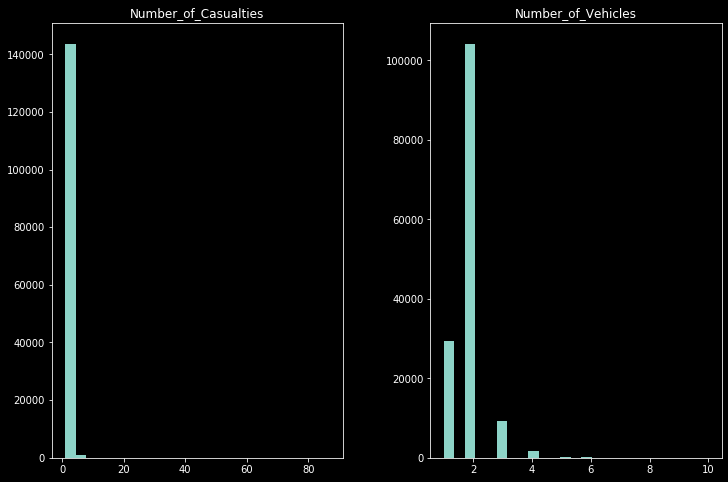

In [63]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')

Column 'speed_limit' seems ok and was previously altered 'engine_capacity_cc'. However, 'number_of_casualties', and 'number_of_vehicles',will be evaluated.

In [64]:
# #number_of_casualties
df['Number_of_Casualties'].value_counts()

1     112701
2      22667
3       6201
4       2108
5        759
6        288
7         76
8         41
9         20
10        11
11         9
12         7
13         2
19         2
58         1
14         1
15         1
17         1
21         1
22         1
24         1
26         1
29         1
87         1
Name: Number_of_Casualties, dtype: int64

In [111]:
#create casualities grouping

def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"
  

In [112]:
#apply function   
df['Number_of_Casualties']= df['Number_of_Casualties'].apply(casualities)

In [113]:
#number_of_casualties
df['Number_of_Casualties'].value_counts()

1     431949
2      79104
3      21641
4       7142
5+      3994
Name: Number_of_Casualties, dtype: int64

In [68]:
# Create csv of cleaned data to use later
df.to_csv('data/Accidents/Cleaned_accidents.csv')